In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
import sys
top_path = '../'
if top_path not in sys.path:
    sys.path.append(top_path)
    
coffea_path = '/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/'
if coffea_path not in sys.path:
    sys.path.insert(0,coffea_path)
    
# ak_path = '/afs/cern.ch/user/a/anpotreb/top/JERC/local-packages/'

# if ak_path not in sys.path:
#     sys.path.insert(0,ak_path)

In [19]:
# from common_binning import JERC_Constants
# from JetEtaBins import JetEtaBins, PtBins

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib as mpl
from coffea import util
from make_comparison_plot import make_comparison_plot, make_double_ratio_plot
from coffea.lookup_tools import extractor
from JetEtaBins import JetEtaBins, PtBins
from collections.abc import Iterable


from helpers import read_data
out_txt_path = '../out_txt'

def read_data2(mean_name, samp, tag1):
    return read_data(mean_name, samp, tag1, out_txt_path)

from common_binning import JERC_Constants

In [21]:
from fileNames.available_datasets import legend_labels
ttbarlab = legend_labels['ttbar']['lab']

In [22]:
from pltStyle import pltStyle
# from scipy.interpolate import CubicSpline
pltStyle(style='hep')

In [6]:
from pltStyle import pltStyle
# from scipy.interpolate import CubicSpline
pltStyle(style='hep')
plt.rcParams['figure.dpi'] = 100

# plt.rcParams['figure.subplot.top'] = 0.93
# plt.rcParams['figure.subplot.right'] = 0.96
# # pltStyle(style='hep')
# # plt.rcParams['figure.subplot.bottom'] = 0.37
# plt.rcParams['figure.subplot.left'] = 0.135
# plt.rcParams['font.size'] = plt.rcParams['font.size']/0.98

In [7]:
### Some recent file to get out the binning
# outname = '../out/CoffeaJERCOutputs_L5_DY-MG-Py.coffea'
outname = '../out/jetdrcut/CoffeaJERCOutputs_L5_DY-MG-Py.coffea'
output = util.load(outname)

f_xvals = np.linspace(0,5,5001)

ptbins = output[list(output.keys())[0]]['ptresponse_b'].axes['pt_gen'].edges
ptbins_c = output[list(output.keys())[0]]['ptresponse_b'].axes['pt_gen'].centers

# etabins = np.array(JERC_Constants.etaBinsEdges_Aut18_full())
etabins = np.array(JERC_Constants.etaBinsEdges_Win14_full())
# etabins = np.array(JERC_Constants.etaBinsEdges_CaloTowers_full())
# etabins = np.array([-5, -3, -2.5, -1.3, 0, 1.3, 2.5, 3, 5])
# etabins = np.array([-5.191, -3.489, -3.139, -2.853,   -2.5,
#                     -2.322,  -1.93, -1.653, -1.305, -0.783,      
#                     0,  0.783,  1.305,  1.653,   1.93,  2.322, 2.5, 
#                     2.853,  3.139,  3.489, 5.191])
    

etabins_abs = etabins[(len(etabins)-1)//2:]
etabins_c = (etabins_abs[:-1]+etabins_abs[1:])/2 #output['ptresponse'].axis('jeteta').centers()

In [8]:
import matplotlib as mpl

In [9]:
# (read_data2("Median", "b", '_L5_QCD-MG-Py')[0:,0])/read_data2("Median", "b", '_L5_QCD-MG-Her')[0:,0]

In [10]:
color_scheme = {key: cycler_vals
    for cycler_vals, key in zip(plt.rcParams['axes.prop_cycle'], ['g', 'q', 'c', 'b', 'QCD', 'DY', 'TTBAR', 'DY200'])}

leggend_dict = {'g': 'Gluons', 'q': 'Quarks', 'b': 'Bottom', 'c': 'Charm'}

In [11]:
def read_data4plot(flav, tag, closure=1, path=out_txt_path):
    '''Read the Mean, MeanStd and RecoPt values of the data with tag `tag` and flavor `flav`.
    If closure==1, there is no clusure, otherwise it has to be of the same shape as the data read '''
    mean_name = "Median" #or 'Mean'
    mean_name_std = mean_name+'Std'
    if not isinstance(closure, Iterable):
        closure_tmp = np.array([closure])
    else:
        closure_tmp = np.array(closure).copy()
        closure_tmp[closure_tmp==0] = np.nan
    median = read_data(mean_name, flav, tag, path)/closure_tmp #[2:]
    medianstd = read_data(mean_name_std, flav, tag, path) #[2:]
    reco = read_data("MeanRecoPt", flav, tag, path)
    return [median, medianstd, reco]
    

Fitting subsample:  all
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_all_eta0p0to0p261.pdf / .png


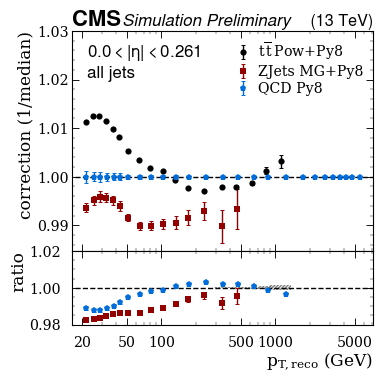

Fitting subsample:  all
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_all_eta1p305to1p566.pdf / .png


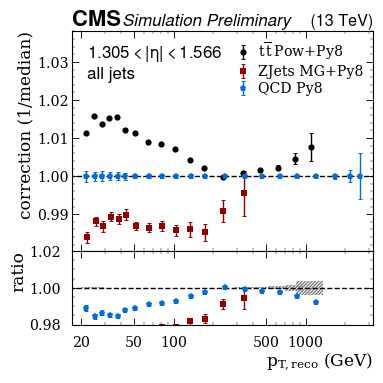

Fitting subsample:  all
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_all_eta2p5to2p964.pdf / .png


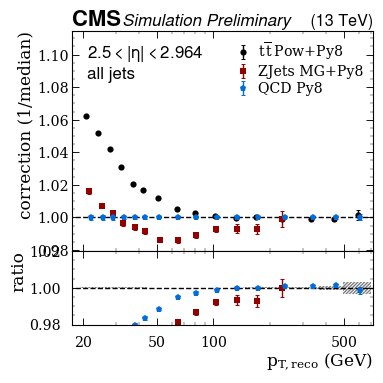

Fitting subsample:  all
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_all_eta2p964to5p191.pdf / .png


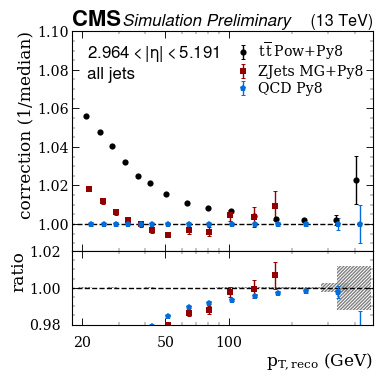

Fitting subsample:  b
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_b_eta0p0to0p261.pdf / .png


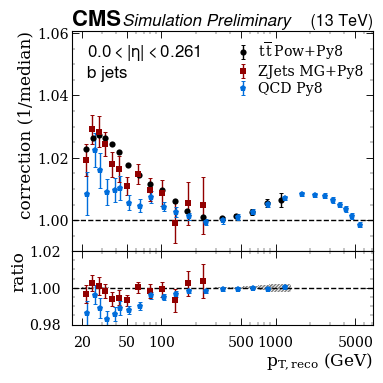

Fitting subsample:  b
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_b_eta1p305to1p566.pdf / .png


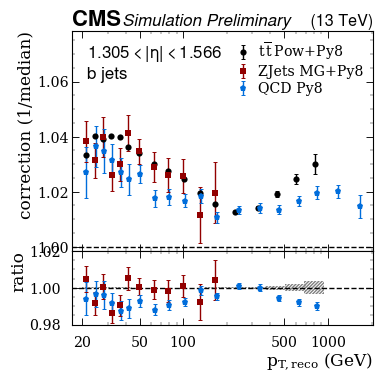

Fitting subsample:  b
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_b_eta2p5to2p964.pdf / .png


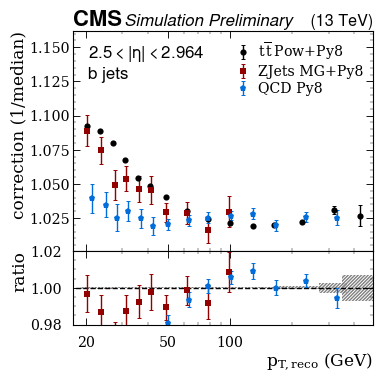

Fitting subsample:  b
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_b_eta2p964to5p191.pdf / .png


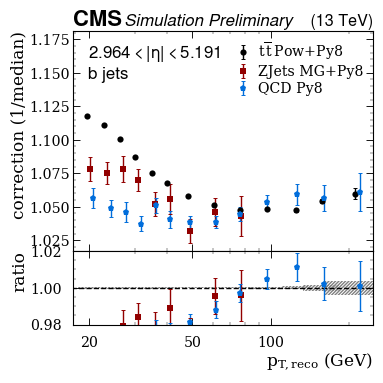

Fitting subsample:  c
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_c_eta0p0to0p261.pdf / .png


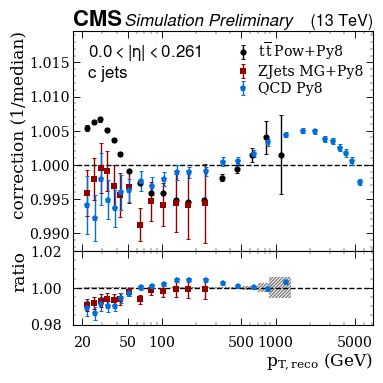

Fitting subsample:  c
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_c_eta1p305to1p566.pdf / .png


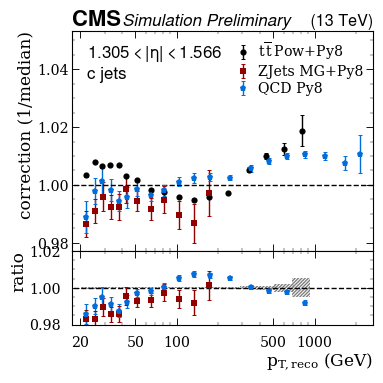

Fitting subsample:  c
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_c_eta2p5to2p964.pdf / .png


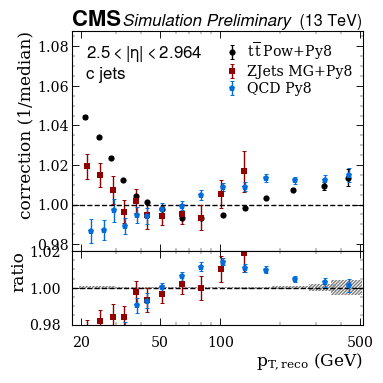

Fitting subsample:  c
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_c_eta2p964to5p191.pdf / .png


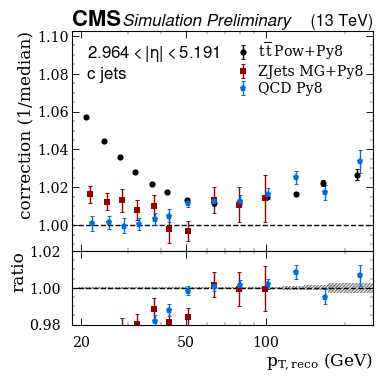

Fitting subsample:  d
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_d_eta0p0to0p261.pdf / .png


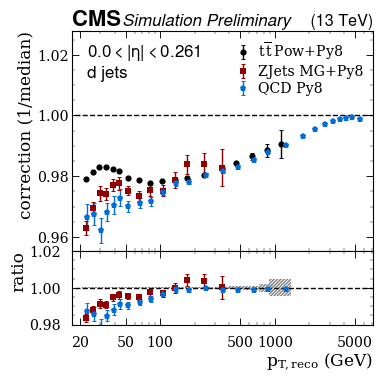

Fitting subsample:  d
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_d_eta1p305to1p566.pdf / .png


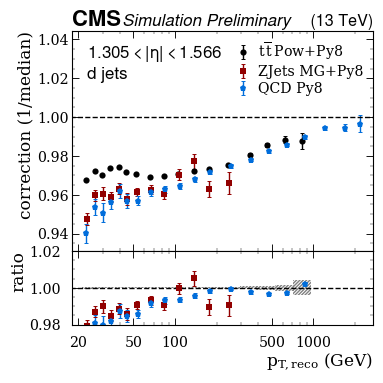

Fitting subsample:  d
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_d_eta2p5to2p964.pdf / .png


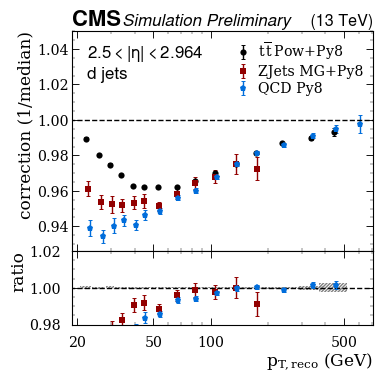

Fitting subsample:  d
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_d_eta2p964to5p191.pdf / .png


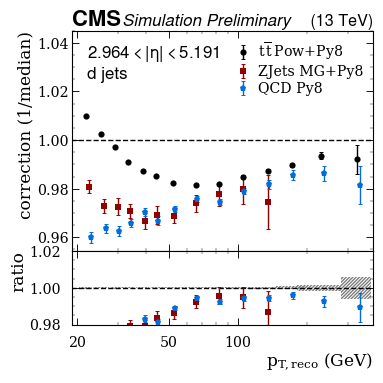

Fitting subsample:  u
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_u_eta0p0to0p261.pdf / .png


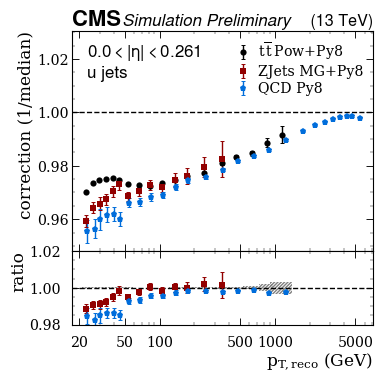

Fitting subsample:  u
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_u_eta1p305to1p566.pdf / .png


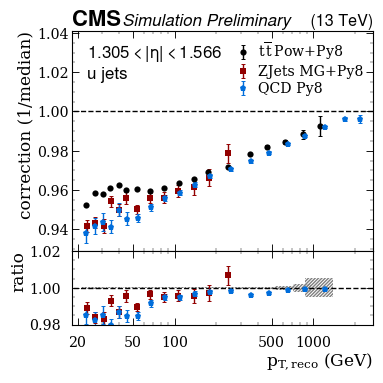

Fitting subsample:  u
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_u_eta2p5to2p964.pdf / .png


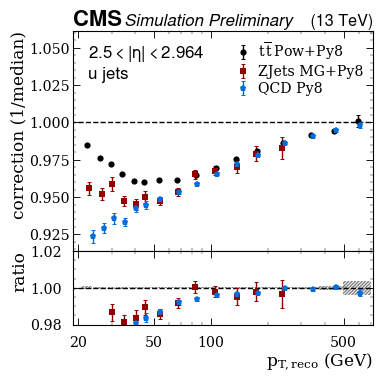

Fitting subsample:  u
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_u_eta2p964to5p191.pdf / .png


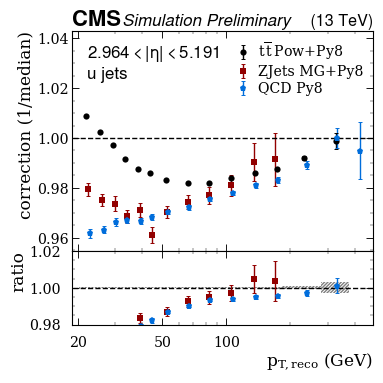

Fitting subsample:  s
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_s_eta0p0to0p261.pdf / .png


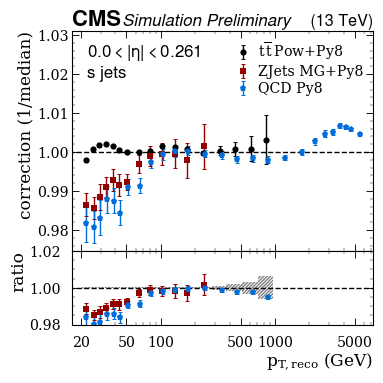

Fitting subsample:  s
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_s_eta1p305to1p566.pdf / .png


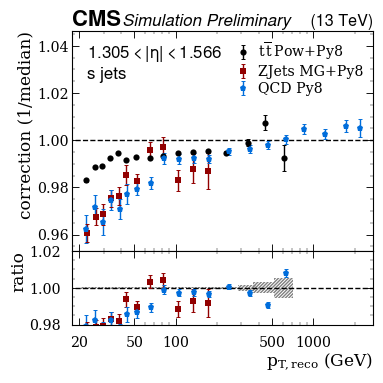

Fitting subsample:  s
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_s_eta2p5to2p964.pdf / .png


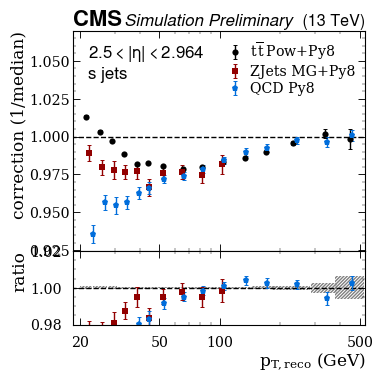

Fitting subsample:  s
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_s_eta2p964to5p191.pdf / .png


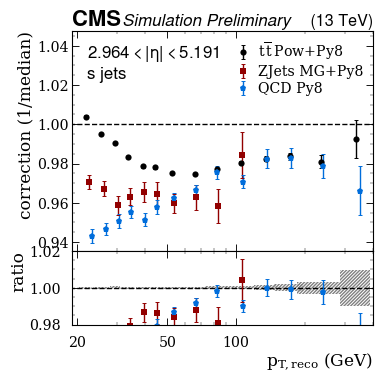

Fitting subsample:  g
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_g_eta0p0to0p261.pdf / .png


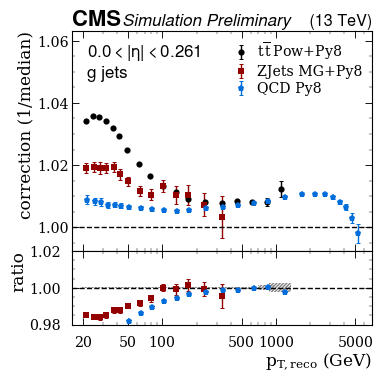

Fitting subsample:  g
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_g_eta1p305to1p566.pdf / .png


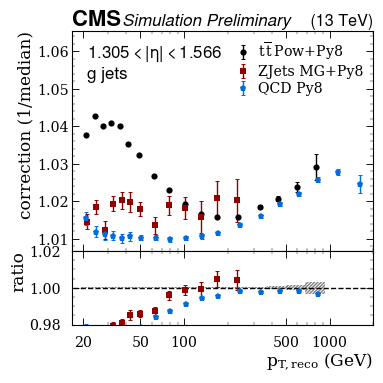

Fitting subsample:  g
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_g_eta2p5to2p964.pdf / .png


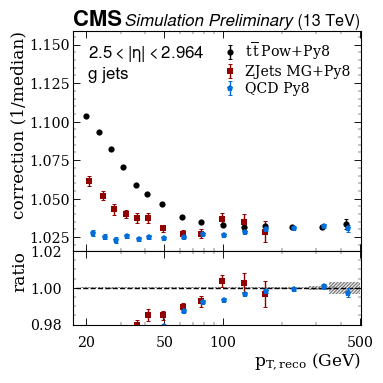

Fitting subsample:  g
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_g_eta2p964to5p191.pdf / .png


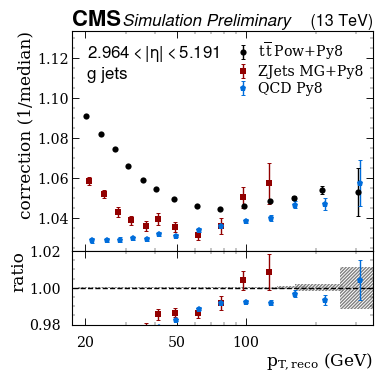

Fitting subsample:  ud
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_ud_eta0p0to0p261.pdf / .png


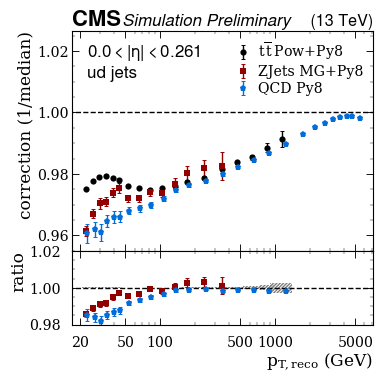

Fitting subsample:  ud
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_ud_eta1p305to1p566.pdf / .png


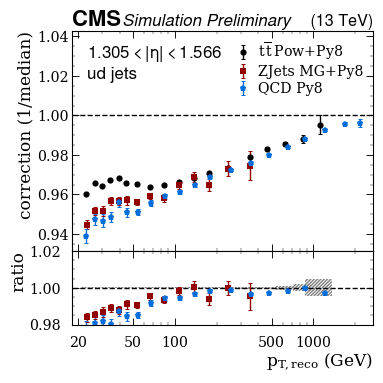

Fitting subsample:  ud
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_ud_eta2p5to2p964.pdf / .png


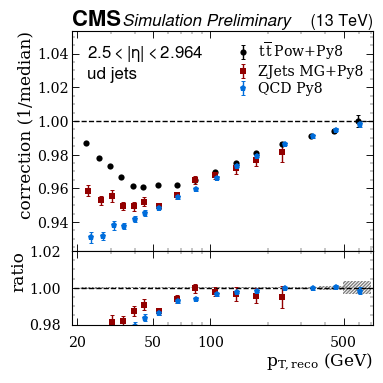

Fitting subsample:  ud
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_ud_eta2p964to5p191.pdf / .png


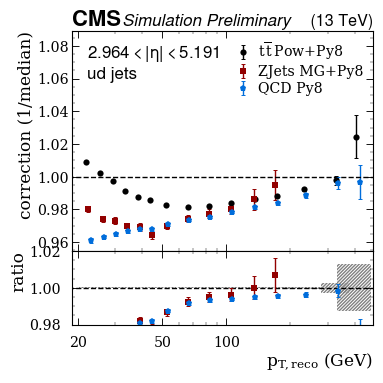

Fitting subsample:  q
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_q_eta0p0to0p261.pdf / .png


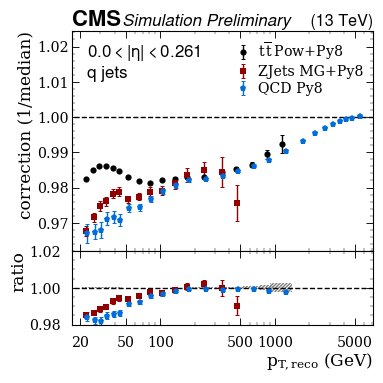

Fitting subsample:  q
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_q_eta1p305to1p566.pdf / .png


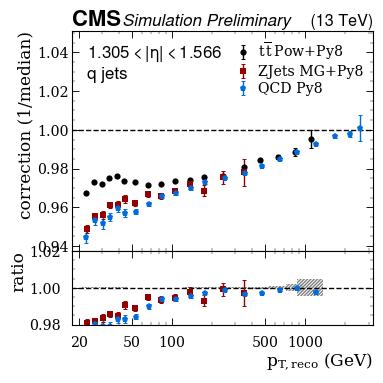

Fitting subsample:  q
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_q_eta2p5to2p964.pdf / .png


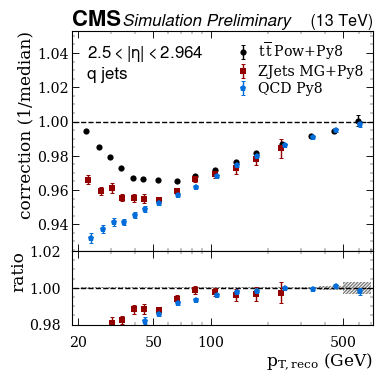

Fitting subsample:  q
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_q_eta2p964to5p191.pdf / .png


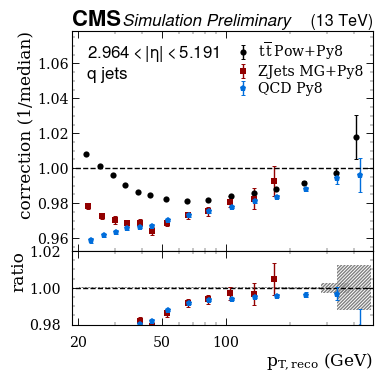

Fitting subsample:  unmatched
Eta:  0.1305
Saving plot for eta =  eta0p0to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_unmatched_eta0p0to0p261.pdf / .png


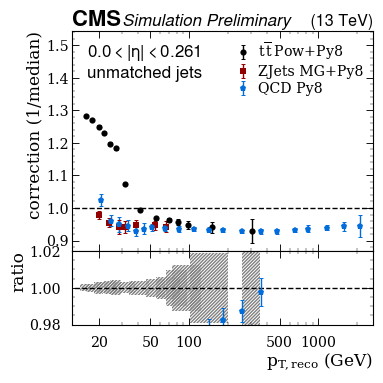

Fitting subsample:  unmatched
Eta:  1.4355
Saving plot for eta =  eta1p305to1p566
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_unmatched_eta1p305to1p566.pdf / .png


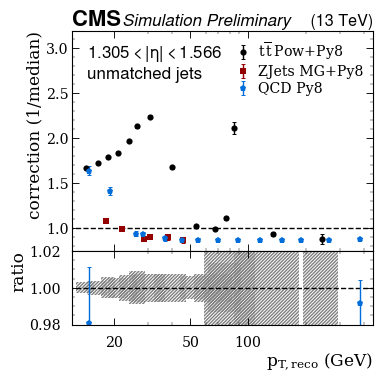

Fitting subsample:  unmatched
Eta:  2.732
Saving plot for eta =  eta2p5to2p964
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_unmatched_eta2p5to2p964.pdf / .png


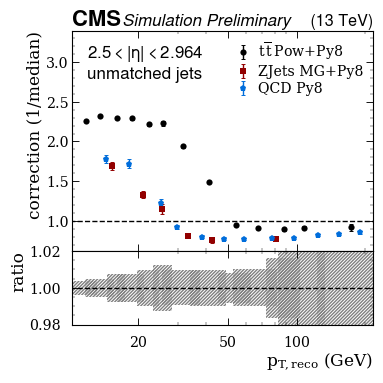

Fitting subsample:  unmatched
Eta:  4.0775
Saving plot for eta =  eta2p964to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8/corr_vs_pt_L5_ttbar_Pow_Py8-ZJets_MG_Py8-QCD_Py8_unmatched_eta2p964to5p191.pdf / .png


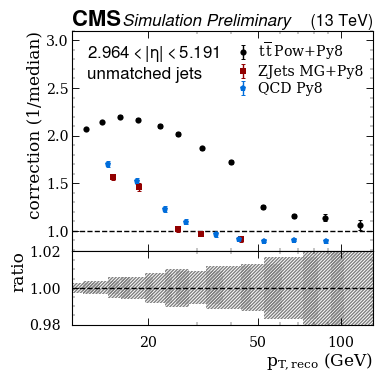

In [16]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
# flavors = ['all'] #, 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
flavors = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
plotvspt = True
# flavors = ['all', 'b']

eta_binning  = "Summer20Flavor"  ### HCalPart, JERC, CoarseCalo, CaloTowers, Summer20Flavor, onebin;
eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''
etabins = JetEtaBins(eta_binning, absolute=True)
ptbins = PtBins("MC_truth")

tag1 = '_L5_QCD-Py'+eta_binning_str
tag2 = '_L5_QCD-MG-Py'+eta_binning_str
tag3 = '_L5_Pythia-TTBAR'+eta_binning_str
tag4 = '_L5_DY-MG-Py'+eta_binning_str
tag5 = '_L5_QCD-Py_nolepsel_cutpromtreco'+eta_binning_str
tag6 = '_L5_QCD-MG-Py_nolepsel_cutpromtreco'+eta_binning_str
tag7 = '_L5_Pythia-TTBAR_nolepsel_cutpromtreco'+eta_binning_str
tag8 = '_L5_DY-MG-Py_nolepsel_cutpromtreco'+eta_binning_str
tag9 = '_L5_QCD-Py_sel_67ac6c3'+eta_binning_str
tag10 = '_L5_DY-MG-Py_sel_67ac6c3'+eta_binning_str
tag11 = '_L5_Pythia-TTBAR_sel_31c4c0c'+eta_binning_str
tag12 = '_L5_QCD-MG-Py_sel_31c4c0c'+eta_binning_str
# tag14 = '_L5_QCD-Py_sel_67ac6c3'+eta_binning_str
tag14 = '_L5_DY-MG-Py_nolepsel_cutallrecolep'+eta_binning_str
tag15 = '_L5_Pythia-TTBAR_nolepsel_cutallrecolep'+eta_binning_str
# tag16 = '_L5_QCD-MG-Py_sel_31c4c0c'+eta_binning_str
tag17 = '_L5_QCD-Py_nolepsel_cutallrecolep'+eta_binning_str
tag18 = '_L5_QCD-Py_nolepsel_drcutgen'+eta_binning_str
tag19 = '_L5_DY-MG-Py_nolepsel_drcutgen'+eta_binning_str
tag20 = '_L5_Pythia-TTBAR_nolepsel_drcutgen'+eta_binning_str
tag21 = '_L5_QCD-MG-Py_2leadingjets_noiso'+eta_binning_str
tag22 = '_L5_QCD-Py_2leadingjets_noiso'+eta_binning_str
tag23 = '_L5_QCD-MG-Py_3leadingjets_noiso'+eta_binning_str
tag24 = '_L5_QCD-Py_3leadingjets_noiso'+eta_binning_str
tag25 = '_L5_QCD-MG-Py_iso_cut'+eta_binning_str
tag26 = '_L5_QCD-Py_iso_cut'+eta_binning_str
tag27 = '_L5_DY-MG-Py_iso_cut'+eta_binning_str
tag28 = '_L5_Pythia-TTBAR_iso_cut'+eta_binning_str
tag29 = '_L5_QCD-MG-Py_3rd_jet'+eta_binning_str
tag30 = '_L5_QCD-Py_3rd_jet'+eta_binning_str

# tag1 = '_L5_DY-MG-Py'
# tag2 = '_L5_DY-MG-Her'

mean_name = "Median"
mean_name_std = mean_name+'Std'
closure_QCD = read_data2(mean_name, 'all', '_L5_QCD-Py'+eta_binning_str)
# closure_QCD_iso = read_data2(mean_name, 'all', tag26)
# closure_TTBAR = read_data2(mean_name, 'all', '_L5_QCD-Py'+eta_binning_str)
# closure_tag29 = read_data2(mean_name, 'all', tag29)
# closure_tag30 = read_data2(mean_name, 'all', tag30)
# closure_Py2 = read_data2(mean_name, 'all', tag3)
# closure_Py3 = read_data2(mean_name, 'all', tag5)
# closure_Py = read_data(mean_name, 'all', tag3)


for flav in flavors:
    data = {
        # label_on_plot: data_list,
        f"{ttbarlab} Pow+Py8": np.array(read_data4plot(flav, tag3, closure_QCD)), #, closure_QCD)), #[:,:-1,:],
#         f"{ttbarlab} Pow+Py8, iso": np.array(read_data4plot(flav, tag28)), # closure_QCD_iso)),
#         f"{ttbarlab} Pow+Py8, no lepton cut": np.array(read_data4plot(flav, tag3, path="../out_txt/no_lep_cuts/")),
        f"ZJets MG+Py8": np.array(read_data4plot(flav, tag4, closure_QCD)), #, closure_QCD)), #[:,:-1,:],
#         f"ZJets MG+Py8, iso": np.array(read_data4plot(flav, tag27)), #, closure_QCD_iso)), #, closure_QCD)), #[:,:-1,:],
        f"QCD Py8": np.array(read_data4plot(flav, tag1, closure_QCD)), #[:,:-1,:],
#         f"QCD MG+Py8, no lepton cut": np.array(read_data4plot(flav, tag2, path="../out_txt/no_lep_cuts/")), #, closure_QCD)), #[:,:-1,:],
#         f"QCD MG+Py8": np.array(read_data4plot(flav, tag2, closure_QCD)),
#         f"{ttbarlab} Pow+Py8": np.array(read_data4plot(flav, tag11)), #, closure_QCD)), #[:,:-1,:],
#         f"ZJets MG+Py8": np.array(read_data4plot(flav, tag10)), #, closure_QCD)), #[:,:-1,:],
#         f"{ttbarlab} Pow+Py8 + cut prompt recolep": np.array(read_data4plot(flav, tag7)), #, closure_QCD)), #[:,:-1,:],
#         f"ZJets MG+Py8 + cut prompt recolep": np.array(read_data4plot(flav, tag8)), #, closure_QCD)), #[:,:-1,:],
#         f"QCD Py8+ cut prompt recolep": np.array(read_data4plot(flav, tag5)), #, closure_QCD)), #[:,:-1,:],
#         f"QCD MG+Py8+ cut prompt recolep": np.array(read_data4plot(flav, tag6)),
#         f"{ttbarlab} Pow+Py8 + cut all recolep": np.array(read_data4plot(flav, tag15)), #, closure_QCD)), #[:,:-1,:],
#         f"ZJets MG+Py8 + cut all recolep": np.array(read_data4plot(flav, tag14)), #, closure_QCD)), #[:,:-1,:],
#         f"QCD Py8 + cut all recolep": np.array(read_data4plot(flav, tag17)), #, closure_QCD)), #[:,:-1,:],
#         f"QCD MG+Py8 + cut all recolep": np.array(read_data4plot(flav, tag12)),
#         f"QCD Py8": np.array(read_data4plot(flav, tag9)), #, closure_QCD)), #[:,:-1,:],
#         f"QCD MG+Py8": np.array(read_data4plot(flav, tag12)),
#         f"QCD MG+Py8,\n 2 leading jets": np.array(read_data4plot(flav, tag21, closure_QCD)),
#         f"QCD Py8, \n2 leading jets": np.array(read_data4plot(flav, tag22, closure_QCD)),
#         f"QCD Py8": np.array(read_data4plot(flav, tag24, closure_QCD)), # , closure_QCD)),
#         f"QCD MG+Py8": np.array(read_data4plot(flav, tag23, closure_QCD)), #, closure_QCD)),
#         f"TTBAR Pow+Py8, iso": np.array(read_data4plot(flav, tag28, closure_QCD_iso)),
#         f"ZJets MG+Py8, iso": np.array(read_data4plot(flav, tag27,closure_QCD_iso)),
#         f"QCD Py8, iso": np.array(read_data4plot(flav, tag26, closure_QCD_iso)),
#         f"QCD MG+Py8, iso": np.array(read_data4plot(flav, tag25,closure_QCD_iso)),
#         f"QCD Py8, 3rd jet": np.array(read_data4plot(flav, tag30, closure_tag30)),
#         f"QCD MG+Py8, 3rd jet": np.array(read_data4plot(flav, tag29, closure_tag29)),

        #         f"QCD Py8, no lepton cut": np.array(read_data4plot(flav, tag1, path="../out_txt/no_lep_cuts/")), #, closure_QCD)), #[:,:-1,:],
    }

#     for k in range(len(etabins_abs)-1):
    for k in etabins.get_bin_idx([0, 1.305, 2.5, 4]):
#     for k in ptbins.get_bin_idx([20, 35, 150, 400]):
        print('Fitting subsample: ', flav)
        print('Eta: ', etabins.centres[k]) if plotvspt else print('pt: ', ptbins.centres[k])
        if plotvspt:
            if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
                continue
        
        make_comparison_plot(data, 
                          {},
                          etabins, ptbins,
                          binidx=k, flav=flav, ratio_name='ratio', inverse=True, plotvspt=plotvspt, ratio_ylim=[0.98, 1.02])
        
3;

In [ ]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
# flavors = ['all'] #, 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
flavors = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
# flavors = ['all', 'b']


tag1 = '_L5_Pythia-TTBAR'
tag2 = '_L5_Pythia-TTBAR_no_nonovelapping_cut'

# tag1 = '_L5_DY-MG-Py'
# tag2 = '_L5_DY-MG-Her'

mean_name = "Median"
mean_name_std = mean_name+'Std'
# closure_Py = read_data2(mean_name, 'all', tag1)
# closure_Py2 = read_data2(mean_name, 'all', tag3)
# closure_Py3 = read_data2(mean_name, 'all', tag5)
# closure_Py = read_data(mean_name, 'all', tag3)


for flav in flavors:
    data = {
        # label_on_plot: data_list,
        f"{ttbarlab} Pow+Py8": np.array(read_data4plot(flav, tag1)), #[:,:-1,:],
        f"{ttbarlab} Pow+Py8, no jet dr cut": np.array(read_data4plot(flav, tag2)), #[:,:-1,:],

    }

    for k in range(len(etabins_abs)-1):
        print('Fitting subsample: ', flav)
        print('Eta: ', k)
        if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
            continue
        
        make_comparison_plot(data, 
                          {},
                          etabins_abs, ptbins[:28],
                          etaidx=k, flav=flav, ratio_name='*/ \n Py8', inverse=False)
        
3;

In [ ]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
# flavors = ['all'] #, 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
flavors = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
# flavors = ['all', 'b']

# subsamples = ['unmatched']
# tag1 = '_L5_DY-MG-Her'
# tag2 = '_L5_DY-MG-Her_noleptoncut'
# tag3 = '_L5_DY-MG-Her_tight_jetId'
tag1 = '_L5_Pythia-TTBAR5files'
tag3 = '_L5_Pythia-TTBAR_tight_jetId'
tag2 = '_L5_Pythia-TTBAR_noleptoncut'
tag4 = '_L5_LHEflav1_TTBAR-JME'
tag5 = '_L5_Pythia-TTBARLHE_flav'
tag6 = '_L5_Pythia-TTBAR'
tag7 = '_L5_Pythia-TTBARLHE_flav_nolepcut'
tag8 = '_L5_Pythia-TTBARLHE_flav_finallepcut'
tag9 = '_L5_Pythia-TTBAR_finallepcut'
# tag3 = '_L5_DY-MG-Her_tight_jetId'
# tag4 = '_L5_QCD-MG-Her_alphacut_0p2'
# tag5 = '_L5_QCD-MG-Py_alphacut_0p2_gen15'
# tag6 = '_L5_QCD-MG-Her_alphacut_0p2_gen15'
# tag7 = '_L5_QCD-MG-Her_alphacut_0p2_promptlep_gen15'
# tag3 = '_L5_QCD-JME'
# tag1 = '_L5_Pythia-TTBAR'
# tag2 = '_L5_Herwig-TTBAR'
# tag1 = '_L5_DY-MG-Py'
# tag2 = '_L5_DY-MG-Her'
# tag3 = '_L5_DY-JME'


mean_name = "Median"
mean_name_std = mean_name+'Std'
# closure_Py = read_data2(mean_name, 'all', tag1)
# closure_Py2 = read_data2(mean_name, 'all', tag3)
# closure_Py3 = read_data2(mean_name, 'all', tag5)
# closure_Py = read_data(mean_name, 'all', tag3)


for flav in flavors:
    data = {
        # label_on_plot: data_list,
        "ttbar Pow+Py8, prompt lepton cut": np.array(read_data4plot(flav, tag1)), #[:,:-1,:],
#         "QCD MG+Her7": np.array(read_data4plot(flav, tag2))[:,:-1,:],
#         r"QCD MG+Py8, $\alpha<0.2$": read_data4plot(flav, tag3),
        r"ttbar Pow+Py8, no lepton cut": read_data4plot(flav, tag2), #, closure_Py3),
#         r"ttbar Pow+Py8, LHEflavor1, old": read_data4plot(flav, tag4), #, closure_Py3),
#         r"ttbar Pow+Py8, LHEflavor1, rep": read_data4plot(flav, tag5), #, closure_Py3),
#         r"ttbar Pow+Py8, LHEflavor1, no cut": read_data4plot(flav, tag7), #, closure_Py3),
#         r"ttbar Pow+Py8, no dressed leptons": read_data4plot(flav, tag6),
#         r"ttbar Pow+Py8, LHEflavor1 final lep": read_data4plot(flav, tag8),
        r"ttbar Pow+Py8, (wrong) reco lep": read_data4plot(flav, tag9),
#         r"ttbar Pow+Py8, no dressed leptons": read_data4plot(flav, tag5),
        r"ttbar Pow+Py8, tight lepton veto": read_data4plot(flav, tag6), #, closure_Py3),
#         r"QCD MG+Her7, alpha<0.2 ": read_data4plot(flav, tag7), #, closure_Py3),
#, $\alpha<0.4$, gen15
        #, $\alpha<0.2$, promtlep, gen15
        #         "TTBAR MG+Her7": [median_2, medianstd_2, reco_pt2],
#         "DY MGFxFx+Py8": [median_3, medianstd_2, reco_pt2],
#         "QCD MG+Her7": [median_2, medianstd_2, reco_pt2],

       }

    for k in range(len(etabins_abs)-1):
        print('Fitting subsample: ', flav)
        print('Eta: ', k)
        if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
            continue
        
        make_comparison_plot(data, 
                          {},
                          etabins_abs, ptbins[:28],
                          etaidx=k, flav=flav, ratio_name='*/ \n Py8', inverse=False)
        
3;

In [ ]:
corr_loc_Sum20_Py = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_fineeta.txt"]
corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_fineeta.txt"]
unc = ["* * ../Summer19UL18_V5_MC/Summer19UL18_V5_MC_UncertaintySources_AK4PFchs.junc.txt"]

ext = extractor()
ext.add_weight_sets(corr_loc_Sum20_Py+corr_loc_Sum20_Her+unc)
ext.finalize()
evaluator2 = ext.make_evaluator()

In [ ]:
# corr_loc_Sum20_Py = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py.txt"]
# corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her.txt"]

corr_loc_Sum20_Py = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_pt30to500.txt"]
corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_pt30to500.txt"]
# corr_loc_Sum20_Py = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_fineeta.txt"]
# corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_fineeta.txt"]
# unc = ["* * ../Summer19UL18_V5_MC/Summer19UL18_V5_MC_UncertaintySources_AK4PFchs.junc.txt"]

ext = extractor()
ext.add_weight_sets(corr_loc_Sum20_Py+corr_loc_Sum20_Her)
ext.finalize()
evaluator = ext.make_evaluator()

In [ ]:
# load_fit_res=True
# flavoes = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
flavoes = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q']

tag1 = '_L5_QCD-MG-Py'
tag2 = '_L5_QCD-MG-Her'
# tag1 = '_L5_Pythia-TTBAR'
# tag2 = '_L5_Herwig-TTBAR'

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_Py = read_data2(mean_name, 'all', tag1)



# ks = [k2, k4] #, k6, k8]
for flav in flavoes:
    data = {
        "QCD, MG+Py8": read_data4plot(flav, tag1, closure_Py), #[median_base, medianstd_base, reco_pt],
        "QCD, MG+Her7": read_data4plot(flav, tag2, closure_Py),
#         "MG+Py8": [median_3, medianstd_3, reco_pt3],
#         "divided": [median_3, medianstd_3, ptbins_c],
       }
    
    flav2 = 'a' if flav=='all' else flav
    evo_Her = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_pt30to500_{flav2}J']
    evo_Py = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_pt30to500_{flav2}J']
    
    functions = {
            "Summer20_Py":    [evo_Py, None],
            "Summer20_Her":   [evo_Her, None],
                       }

    for k in range(len(etabins_abs)-1):
        print('Fitting subsample: ', flav)
        print('Eta: ', k)
        median_base = data[list(data.keys())[0]]
        if not np.any(median_base[2][:,k]>-0.1):
            continue
        
        make_comparison_plot(data, 
                          functions,
                             etabins_abs, ptbins,
                          etaidx=k, flav=flav, ratio_name='*/ \n Py8')
        
3;

### Comparison with old corrections

In [22]:
Aut18_samples = ['all', 'b', 'c', 's', 'ud', 'g' ]
Sum16_samples = ['b', 'c', 's', 'ud', 'g' ]

In [23]:
list_corr_Sum16 = ["Summer16_07Aug2017_V15_Flavor_Pythia8_MC_"+samp+"_L5Flavor_AK4PFchs.txt" for samp in Sum16_samples]
list_corr_Sum16.append("Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs.txt")
list_corr_Sum16.append("Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L3Absolute_AK4PFchs.txt")
corr_loc_Sum16 = ["* * ../Summer16_07Aug2017_V15_Flavor_Pythia8_MC/"+corr for corr in list_corr_Sum16]
list_corr_Aut18 = ["Autumn18_V3_MC_Pythia8_"+samp+"_L2Relative_AK4PFchs.txt" for samp in Aut18_samples]
corr_loc_Aut18 = ["* * ../Autumn18_V3_MC_Pythia8/"+corr for corr in list_corr_Aut18]
corr_loc_Winter14 = ["* * ../Winter14_V8_MC_L5Flavor/Winter14_V8_MC_L5Flavor_AK5PFchs.txt"]
corr_loc_Sum20 = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py.txt"]
corr_loc_Sum20Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her.txt"]
corr_loc_Sum20_fineta = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_fineeta.txt"]
corr_loc_Sum20Her_fineta = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_fineeta.txt"]
corr_loc_Sum20_coarseCalo = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_CoarseCalo.txt"]
corr_loc_Sum20Her_coarseCalo = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_CoarseCalo.txt"]
corr_loc_Sum20_JERC = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_JERC.txt"]
corr_loc_Sum20Her_JERC = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_JERC.txt"]
corr_loc_Sum20standPy_JERC = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD_CaloTowers.txt"]
corr_loc_Sum20standPy_CoarseCalo = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD_CoarseCalo.txt"]
corr_loc_Sum20Her_JERC = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_JERC.txt"]
corr_loc_Sum20standPy_JERC = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD_CaloTowers.txt"]
corr_loc_Sum20Her_Summer20Flavor = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_Summer20Flavor.txt"]
corr_loc_Sum20_Summer20Flavor    = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Summer20Flavor.txt"]

list_corr_Aut18 = ["Autumn18_V3_MC_Herwig7_"+samp+"_L2Relative_AK4PFchs.txt" for samp in Aut18_samples]
corr_loc_Aut18_Her = ["* * ../Autumn18_V3_MC_Pythia8/"+corr for corr in list_corr_Aut18]
# corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her-etaAut18.txt"]

In [24]:
# corr_loc_Sum16+corr_loc_Aut18+corr_loc_Winter14+corr_loc_Sum20+corr_loc_Aut18_Her+corr_loc_Sum20_Her

In [25]:
ext = extractor()
ext.add_weight_sets(corr_loc_Sum16+corr_loc_Aut18+corr_loc_Winter14+corr_loc_Sum20+corr_loc_Sum20Her
                    +corr_loc_Sum20_fineta+corr_loc_Sum20Her_fineta
                    +corr_loc_Sum20_coarseCalo+corr_loc_Sum20Her_coarseCalo
                    +corr_loc_Sum20_JERC+corr_loc_Sum20Her_JERC
                    +corr_loc_Aut18_Her+corr_loc_Sum20standPy_JERC+corr_loc_Sum20standPy_CoarseCalo
                    +corr_loc_Sum20Her_Summer20Flavor+corr_loc_Sum20_Summer20Flavor) #+corr_loc_Sum20_Her)
# ext.add_weight_sets(corr_loc_Winter14)
ext.finalize()

# ext._names
evaluator = ext.make_evaluator()
# evo = evaluator['Autumn18_V3_MC_Pythia8_b_L2Relative_AK4PFchs']
# evaluator['Autumn18_V3_MC_Herwig7_b_L2Relative_AK4PFchs']
# evaluator['Autumn18_V3_MC_Herwig7_b_L2Relative_AK4PFchs']

In [26]:
# evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']._bins

Plotting subsample:  b
Eta:  0
Saving plot for eta =  eta0p0to0p783
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta0p0to0p783.pdf / .png


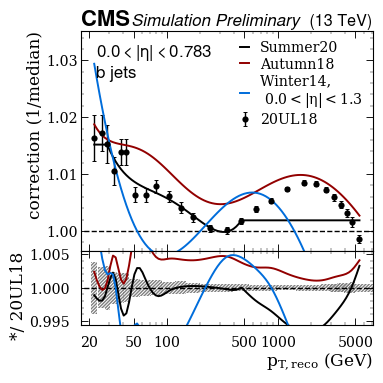

Plotting subsample:  b
Eta:  1
Saving plot for eta =  eta0p783to1p305
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta0p783to1p305.pdf / .png


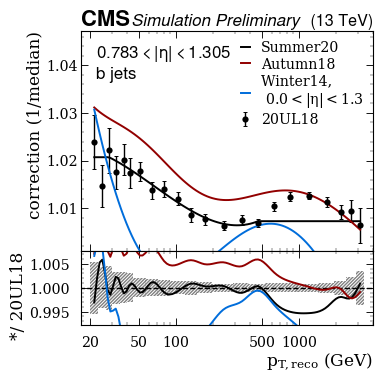

Plotting subsample:  b
Eta:  2
Saving plot for eta =  eta1p305to1p653
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta1p305to1p653.pdf / .png


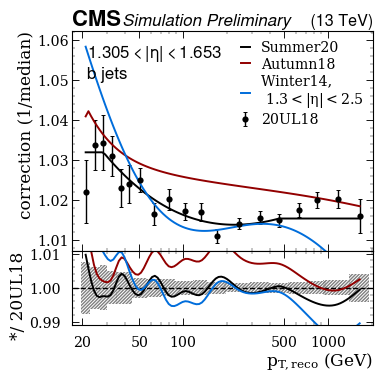

Plotting subsample:  b
Eta:  3
Saving plot for eta =  eta1p653to1p93
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta1p653to1p93.pdf / .png


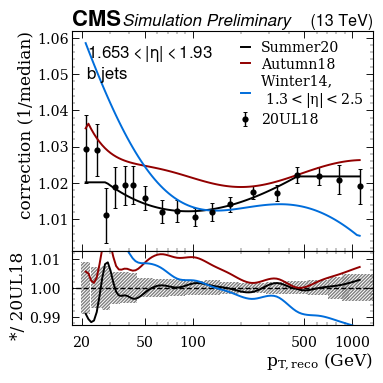

Plotting subsample:  b
Eta:  4
Saving plot for eta =  eta1p93to2p322
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta1p93to2p322.pdf / .png


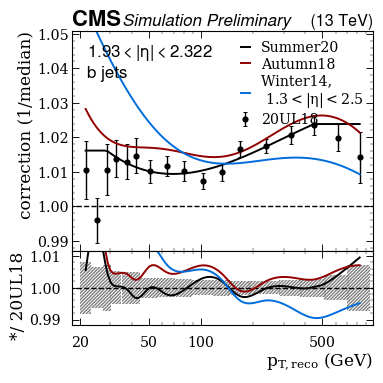

Plotting subsample:  b
Eta:  5
Saving plot for eta =  eta2p322to2p5
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta2p322to2p5.pdf / .png


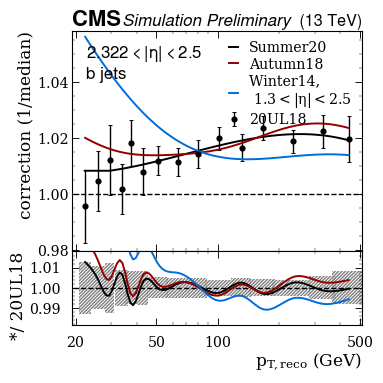

Plotting subsample:  b
Eta:  6
Saving plot for eta =  eta2p5to2p853
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta2p5to2p853.pdf / .png


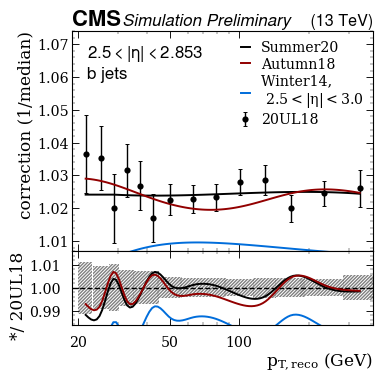

Plotting subsample:  b
Eta:  7
Saving plot for eta =  eta2p853to3p139
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta2p853to3p139.pdf / .png


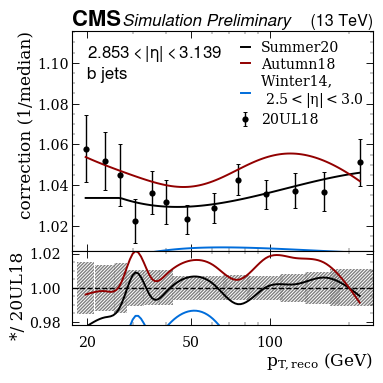

Plotting subsample:  b
Eta:  8
Saving plot for eta =  eta3p139to3p489
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta3p139to3p489.pdf / .png


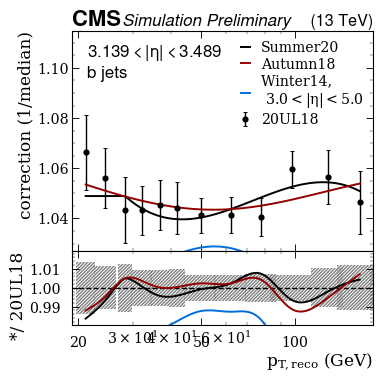

Plotting subsample:  b
Eta:  9
Saving plot for eta =  eta3p489to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_b_eta3p489to5p191.pdf / .png


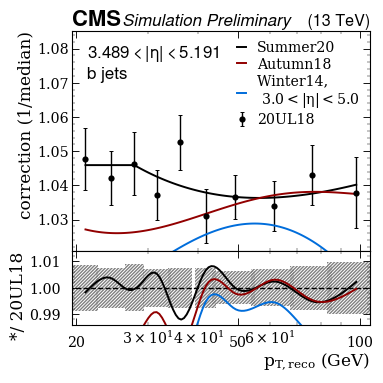

Plotting subsample:  c
Eta:  0
Saving plot for eta =  eta0p0to0p783
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta0p0to0p783.pdf / .png


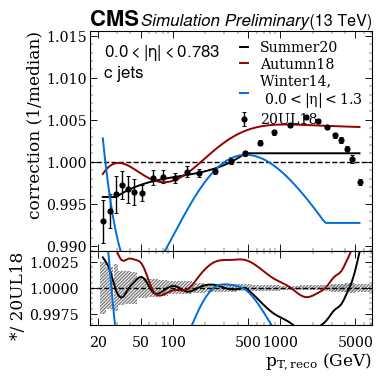

Plotting subsample:  c
Eta:  1
Saving plot for eta =  eta0p783to1p305
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta0p783to1p305.pdf / .png


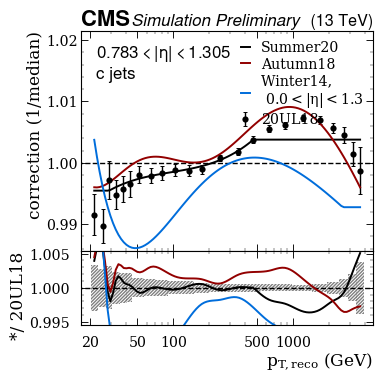

Plotting subsample:  c
Eta:  2
Saving plot for eta =  eta1p305to1p653
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta1p305to1p653.pdf / .png


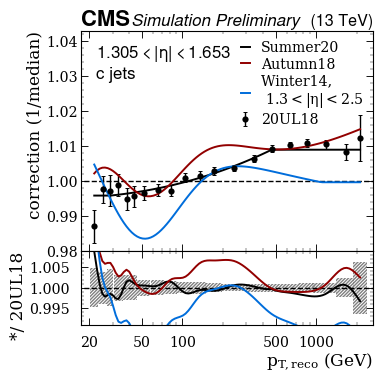

Plotting subsample:  c
Eta:  3
Saving plot for eta =  eta1p653to1p93
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta1p653to1p93.pdf / .png


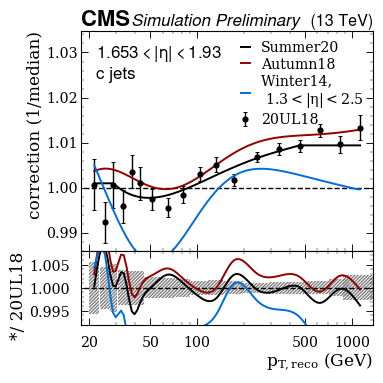

Plotting subsample:  c
Eta:  4
Saving plot for eta =  eta1p93to2p322
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta1p93to2p322.pdf / .png


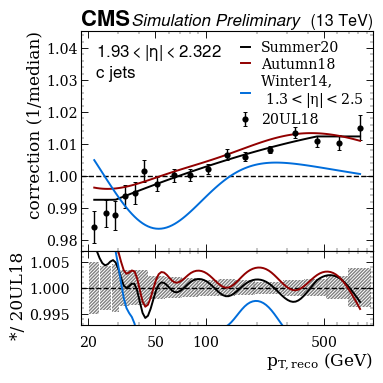

Plotting subsample:  c
Eta:  5
Saving plot for eta =  eta2p322to2p5
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta2p322to2p5.pdf / .png


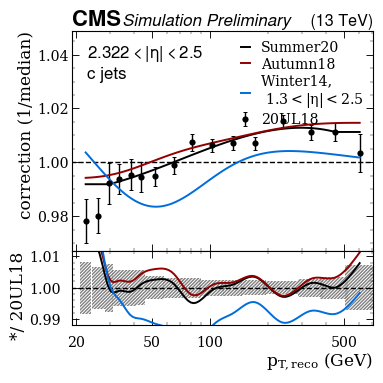

Plotting subsample:  c
Eta:  6
Saving plot for eta =  eta2p5to2p853
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta2p5to2p853.pdf / .png


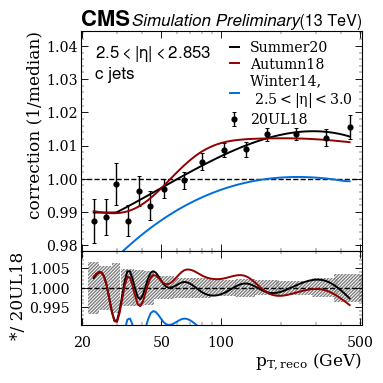

Plotting subsample:  c
Eta:  7
Saving plot for eta =  eta2p853to3p139
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta2p853to3p139.pdf / .png


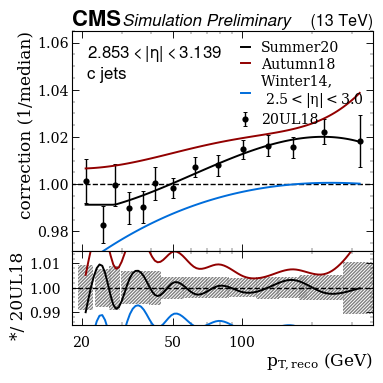

Plotting subsample:  c
Eta:  8
Saving plot for eta =  eta3p139to3p489
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta3p139to3p489.pdf / .png


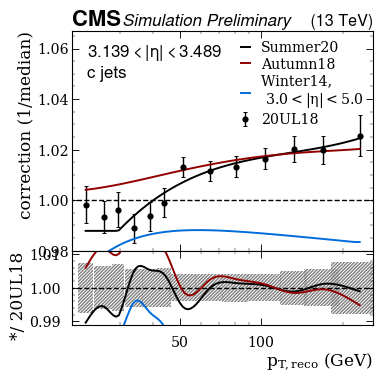

Plotting subsample:  c
Eta:  9
Saving plot for eta =  eta3p489to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_c_eta3p489to5p191.pdf / .png


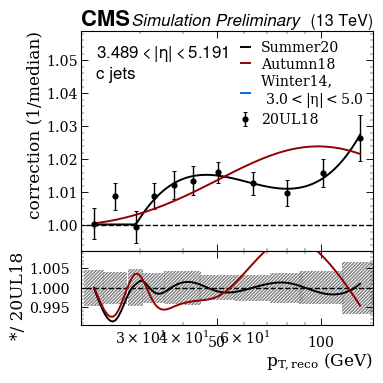

Plotting subsample:  d
Eta:  0
Saving plot for eta =  eta0p0to0p783
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta0p0to0p783.pdf / .png


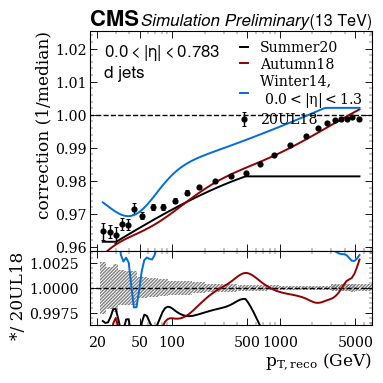

Plotting subsample:  d
Eta:  1
Saving plot for eta =  eta0p783to1p305
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta0p783to1p305.pdf / .png


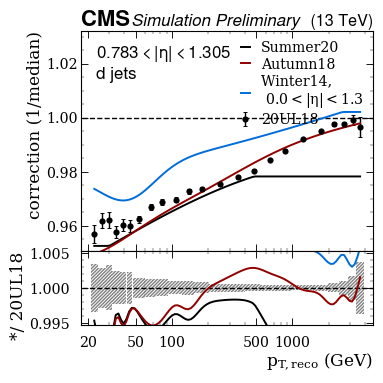

Plotting subsample:  d
Eta:  2
Saving plot for eta =  eta1p305to1p653
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta1p305to1p653.pdf / .png


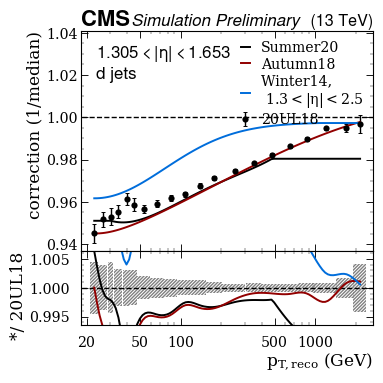

Plotting subsample:  d
Eta:  3
Saving plot for eta =  eta1p653to1p93
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta1p653to1p93.pdf / .png


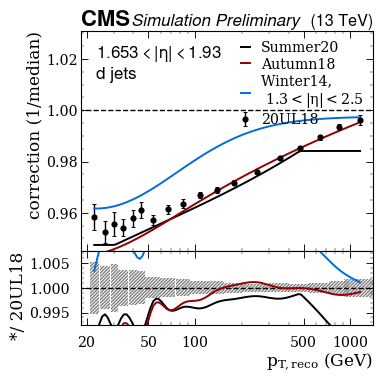

Plotting subsample:  d
Eta:  4
Saving plot for eta =  eta1p93to2p322
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta1p93to2p322.pdf / .png


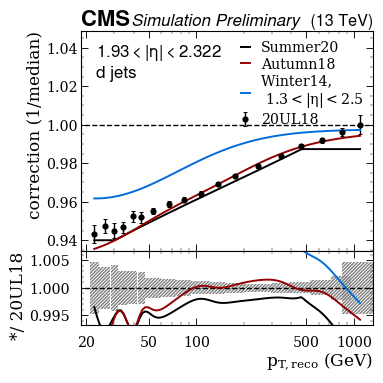

Plotting subsample:  d
Eta:  5
Saving plot for eta =  eta2p322to2p5
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta2p322to2p5.pdf / .png


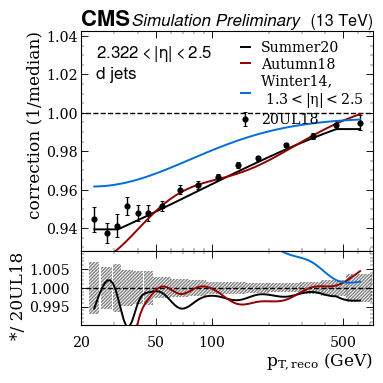

Plotting subsample:  d
Eta:  6
Saving plot for eta =  eta2p5to2p853
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta2p5to2p853.pdf / .png


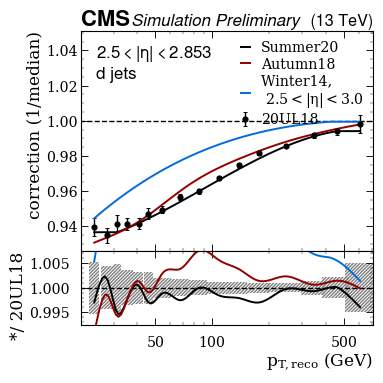

Plotting subsample:  d
Eta:  7
Saving plot for eta =  eta2p853to3p139
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta2p853to3p139.pdf / .png


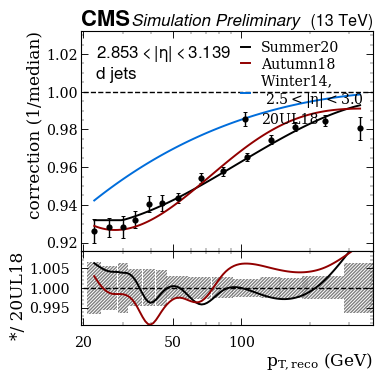

Plotting subsample:  d
Eta:  8
Saving plot for eta =  eta3p139to3p489
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta3p139to3p489.pdf / .png


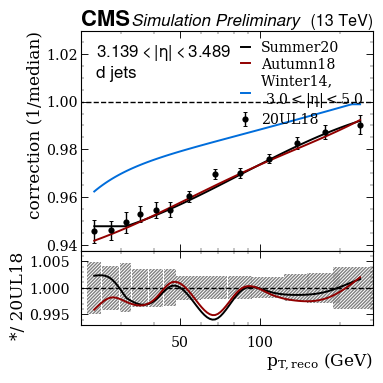

Plotting subsample:  d
Eta:  9
Saving plot for eta =  eta3p489to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_d_eta3p489to5p191.pdf / .png


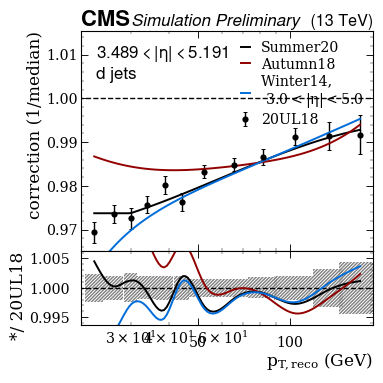

Plotting subsample:  u
Eta:  0
Saving plot for eta =  eta0p0to0p783
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta0p0to0p783.pdf / .png


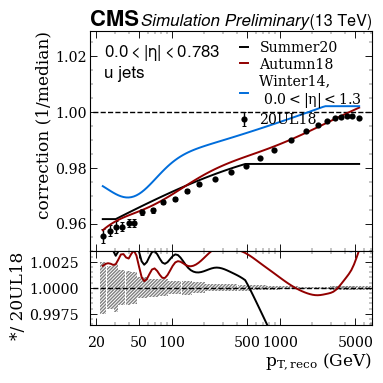

Plotting subsample:  u
Eta:  1
Saving plot for eta =  eta0p783to1p305
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta0p783to1p305.pdf / .png


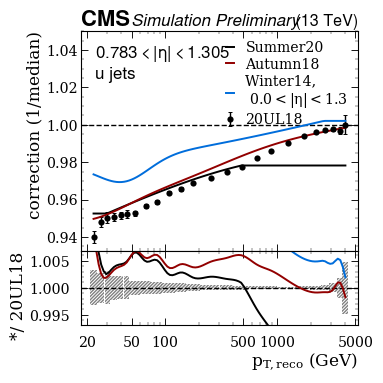

Plotting subsample:  u
Eta:  2
Saving plot for eta =  eta1p305to1p653
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta1p305to1p653.pdf / .png


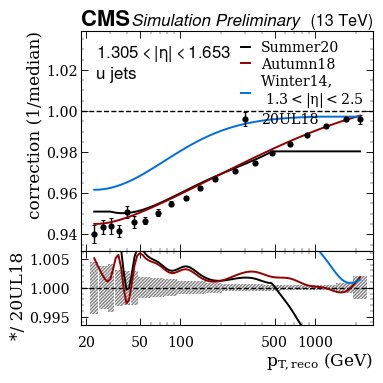

Plotting subsample:  u
Eta:  3
Saving plot for eta =  eta1p653to1p93
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta1p653to1p93.pdf / .png


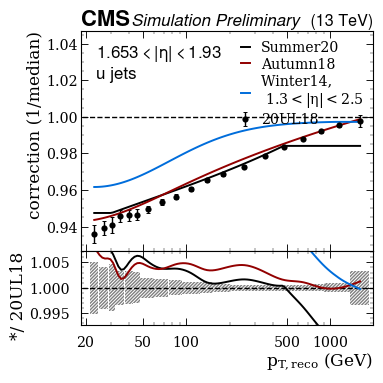

Plotting subsample:  u
Eta:  4
Saving plot for eta =  eta1p93to2p322
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta1p93to2p322.pdf / .png


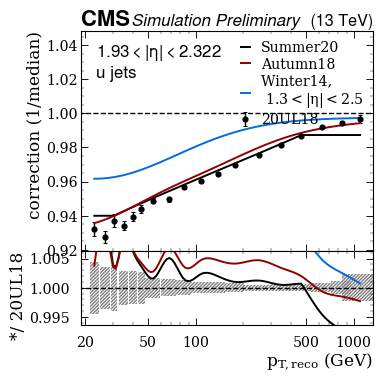

Plotting subsample:  u
Eta:  5
Saving plot for eta =  eta2p322to2p5
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta2p322to2p5.pdf / .png


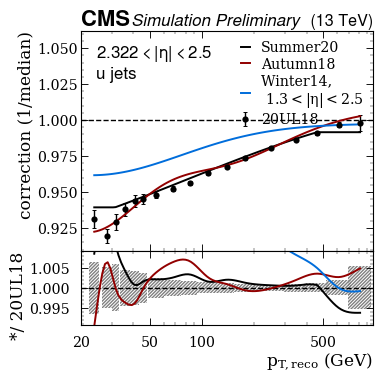

Plotting subsample:  u
Eta:  6
Saving plot for eta =  eta2p5to2p853
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta2p5to2p853.pdf / .png


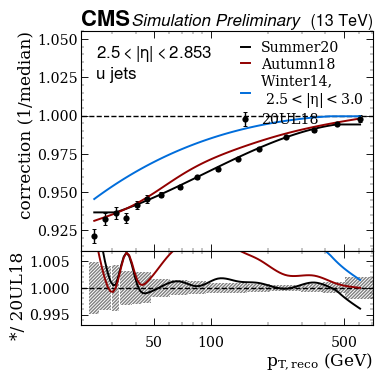

Plotting subsample:  u
Eta:  7
Saving plot for eta =  eta2p853to3p139
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta2p853to3p139.pdf / .png


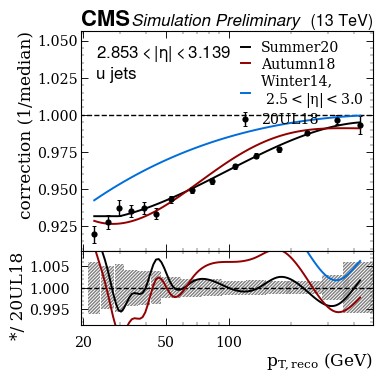

Plotting subsample:  u
Eta:  8
Saving plot for eta =  eta3p139to3p489
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta3p139to3p489.pdf / .png


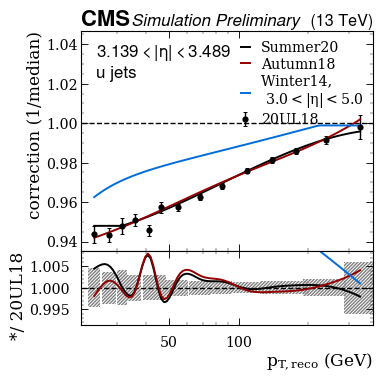

Plotting subsample:  u
Eta:  9
Saving plot for eta =  eta3p489to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_u_eta3p489to5p191.pdf / .png


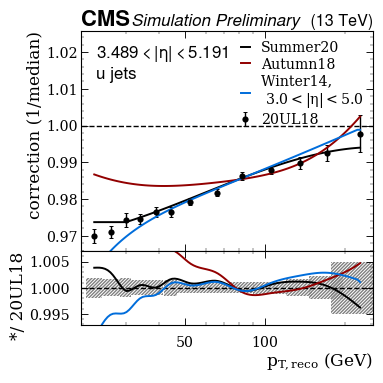

Plotting subsample:  s
Eta:  0
Saving plot for eta =  eta0p0to0p783
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta0p0to0p783.pdf / .png


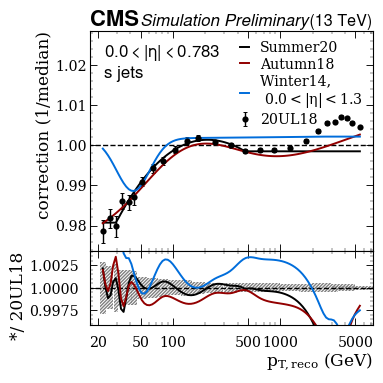

Plotting subsample:  s
Eta:  1
Saving plot for eta =  eta0p783to1p305
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta0p783to1p305.pdf / .png


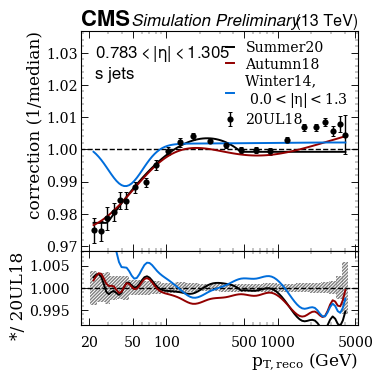

Plotting subsample:  s
Eta:  2
Saving plot for eta =  eta1p305to1p653
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta1p305to1p653.pdf / .png


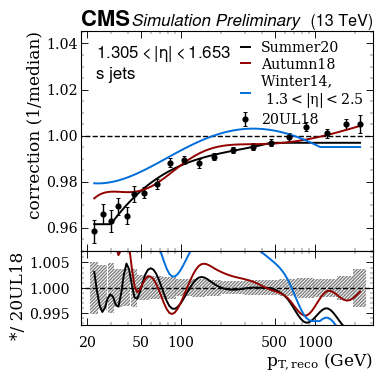

Plotting subsample:  s
Eta:  3
Saving plot for eta =  eta1p653to1p93
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta1p653to1p93.pdf / .png


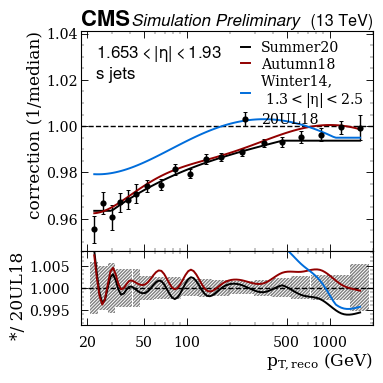

Plotting subsample:  s
Eta:  4
Saving plot for eta =  eta1p93to2p322
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta1p93to2p322.pdf / .png


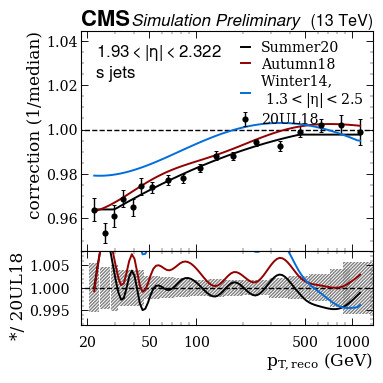

Plotting subsample:  s
Eta:  5
Saving plot for eta =  eta2p322to2p5
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta2p322to2p5.pdf / .png


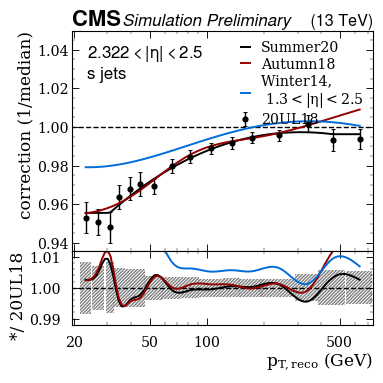

Plotting subsample:  s
Eta:  6
Saving plot for eta =  eta2p5to2p853
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta2p5to2p853.pdf / .png


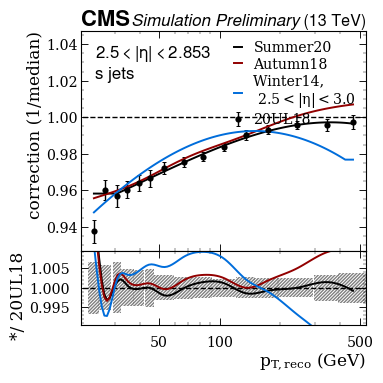

Plotting subsample:  s
Eta:  7
Saving plot for eta =  eta2p853to3p139
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta2p853to3p139.pdf / .png


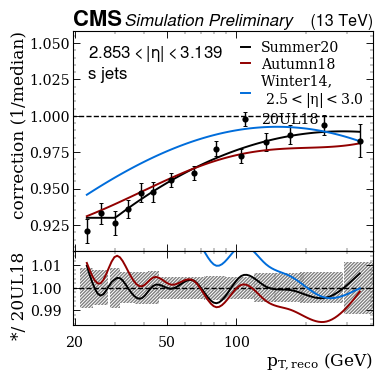

Plotting subsample:  s
Eta:  8
Saving plot for eta =  eta3p139to3p489
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta3p139to3p489.pdf / .png


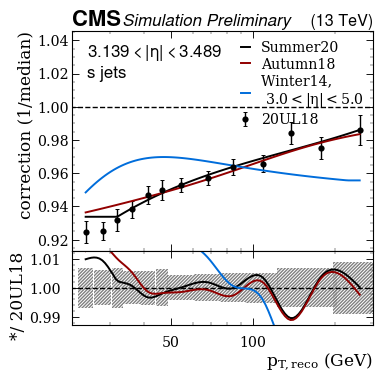

Plotting subsample:  s
Eta:  9
Saving plot for eta =  eta3p489to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_s_eta3p489to5p191.pdf / .png


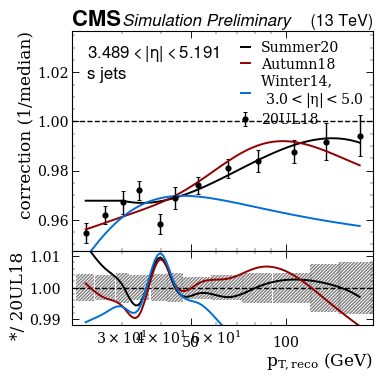

Plotting subsample:  g
Eta:  0
Saving plot for eta =  eta0p0to0p783
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta0p0to0p783.pdf / .png


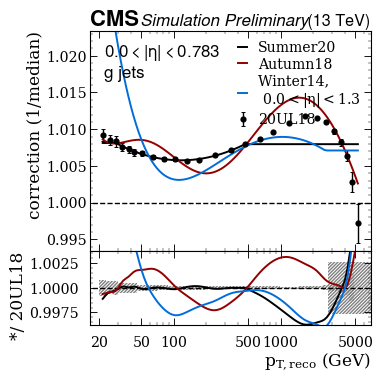

Plotting subsample:  g
Eta:  1
Saving plot for eta =  eta0p783to1p305
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta0p783to1p305.pdf / .png


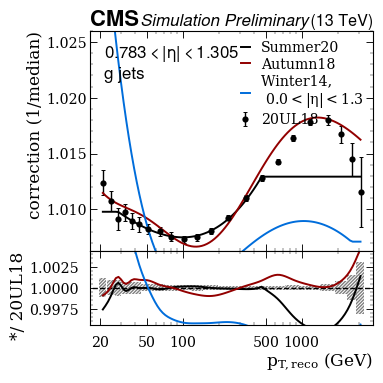

Plotting subsample:  g
Eta:  2
Saving plot for eta =  eta1p305to1p653
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta1p305to1p653.pdf / .png


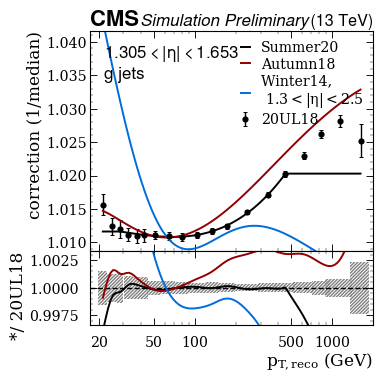

Plotting subsample:  g
Eta:  3
Saving plot for eta =  eta1p653to1p93
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta1p653to1p93.pdf / .png


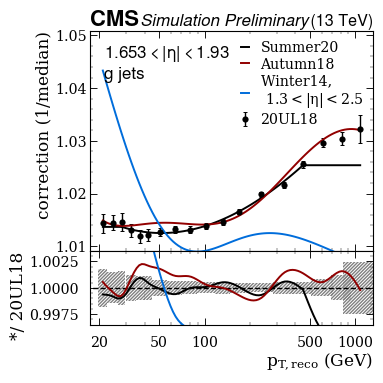

Plotting subsample:  g
Eta:  4
Saving plot for eta =  eta1p93to2p322
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta1p93to2p322.pdf / .png


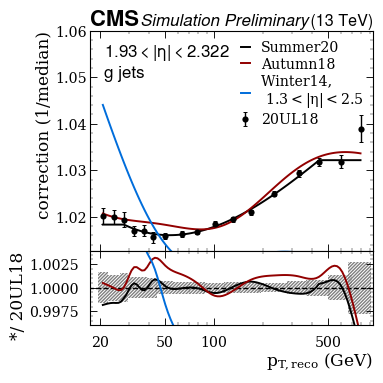

Plotting subsample:  g
Eta:  5
Saving plot for eta =  eta2p322to2p5
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta2p322to2p5.pdf / .png


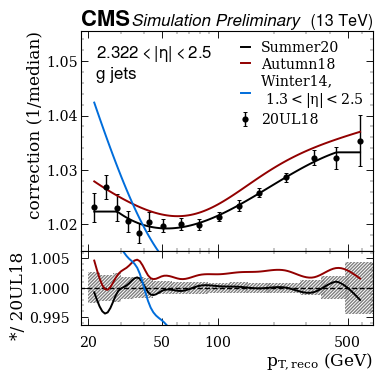

Plotting subsample:  g
Eta:  6
Saving plot for eta =  eta2p5to2p853
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta2p5to2p853.pdf / .png


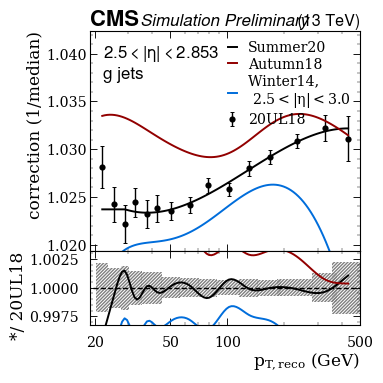

Plotting subsample:  g
Eta:  7
Saving plot for eta =  eta2p853to3p139
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta2p853to3p139.pdf / .png


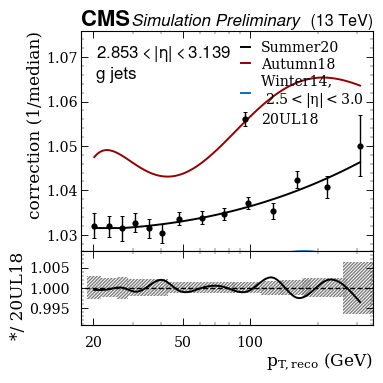

Plotting subsample:  g
Eta:  8
Saving plot for eta =  eta3p139to3p489
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta3p139to3p489.pdf / .png


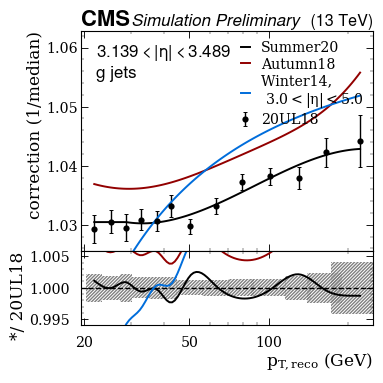

Plotting subsample:  g
Eta:  9
Saving plot for eta =  eta3p489to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_g_eta3p489to5p191.pdf / .png


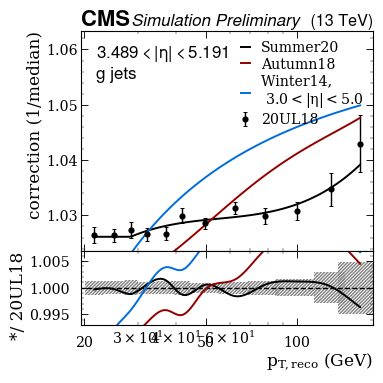

Plotting subsample:  ud
Eta:  0
Saving plot for eta =  eta0p0to0p783
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta0p0to0p783.pdf / .png


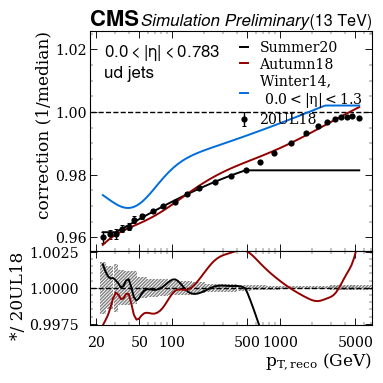

Plotting subsample:  ud
Eta:  1
Saving plot for eta =  eta0p783to1p305
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta0p783to1p305.pdf / .png


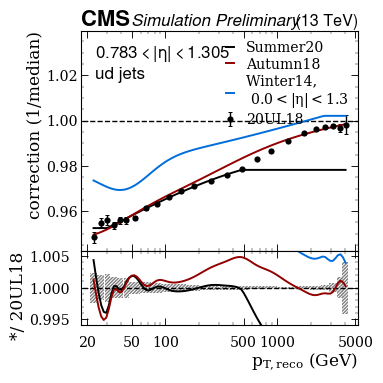

Plotting subsample:  ud
Eta:  2
Saving plot for eta =  eta1p305to1p653
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta1p305to1p653.pdf / .png


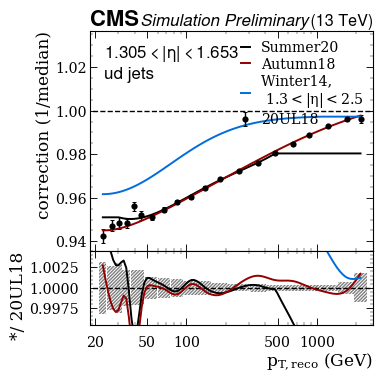

Plotting subsample:  ud
Eta:  3
Saving plot for eta =  eta1p653to1p93
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta1p653to1p93.pdf / .png


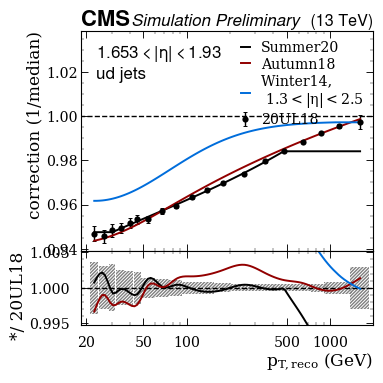

Plotting subsample:  ud
Eta:  4
Saving plot for eta =  eta1p93to2p322
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta1p93to2p322.pdf / .png


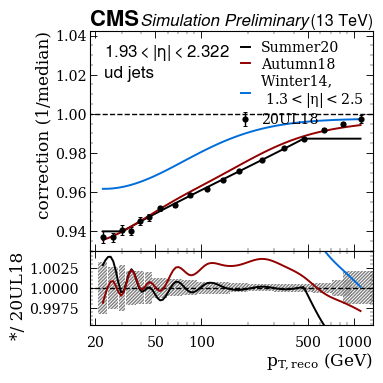

Plotting subsample:  ud
Eta:  5
Saving plot for eta =  eta2p322to2p5
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta2p322to2p5.pdf / .png


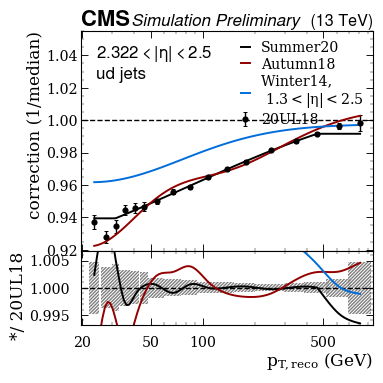

Plotting subsample:  ud
Eta:  6
Saving plot for eta =  eta2p5to2p853
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta2p5to2p853.pdf / .png


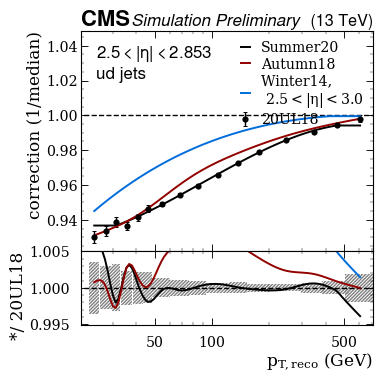

Plotting subsample:  ud
Eta:  7
Saving plot for eta =  eta2p853to3p139
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta2p853to3p139.pdf / .png


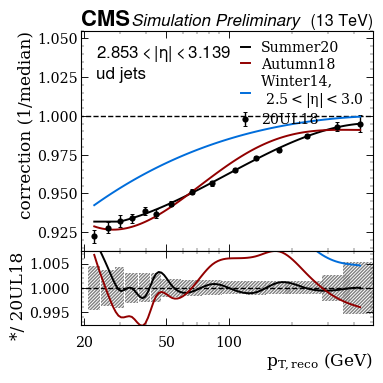

Plotting subsample:  ud
Eta:  8
Saving plot for eta =  eta3p139to3p489
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta3p139to3p489.pdf / .png


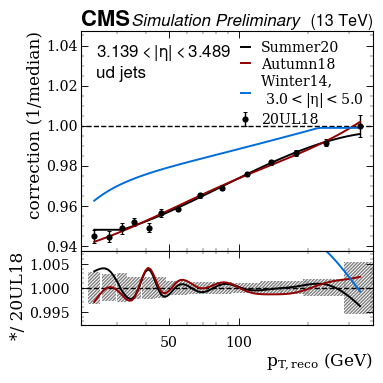

Plotting subsample:  ud
Eta:  9
Saving plot for eta =  eta3p489to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_ud_eta3p489to5p191.pdf / .png


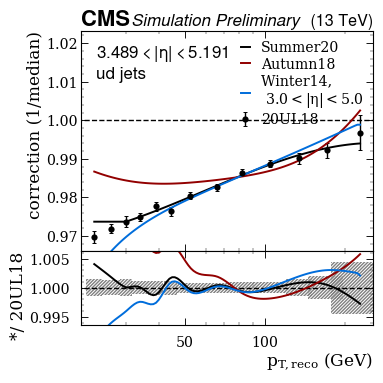

Plotting subsample:  q
Eta:  0
Saving plot for eta =  eta0p0to0p783
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta0p0to0p783.pdf / .png


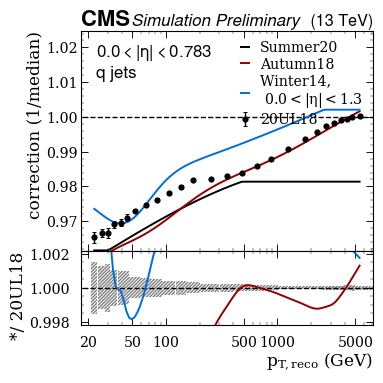

Plotting subsample:  q
Eta:  1
Saving plot for eta =  eta0p783to1p305
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta0p783to1p305.pdf / .png


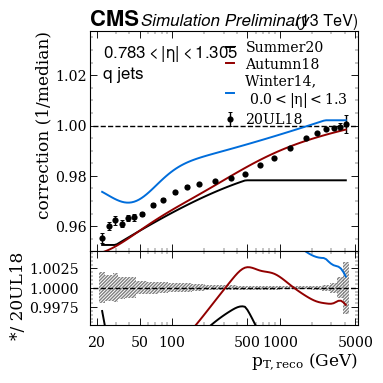

Plotting subsample:  q
Eta:  2
Saving plot for eta =  eta1p305to1p653
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta1p305to1p653.pdf / .png


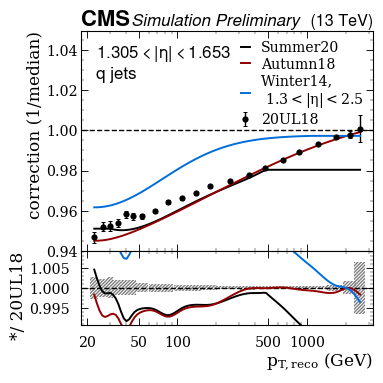

Plotting subsample:  q
Eta:  3
Saving plot for eta =  eta1p653to1p93
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta1p653to1p93.pdf / .png


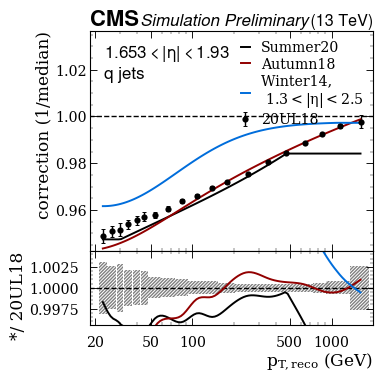

Plotting subsample:  q
Eta:  4
Saving plot for eta =  eta1p93to2p322
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta1p93to2p322.pdf / .png


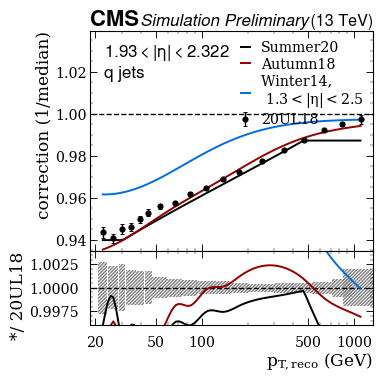

Plotting subsample:  q
Eta:  5
Saving plot for eta =  eta2p322to2p5
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta2p322to2p5.pdf / .png


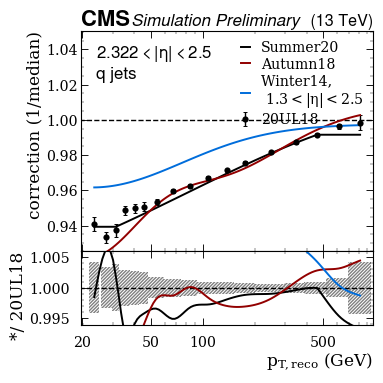

Plotting subsample:  q
Eta:  6
Saving plot for eta =  eta2p5to2p853
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta2p5to2p853.pdf / .png


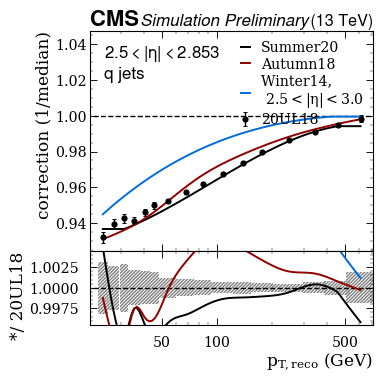

Plotting subsample:  q
Eta:  7
Saving plot for eta =  eta2p853to3p139
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta2p853to3p139.pdf / .png


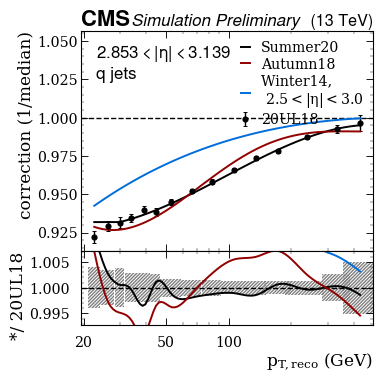

Plotting subsample:  q
Eta:  8
Saving plot for eta =  eta3p139to3p489
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta3p139to3p489.pdf / .png


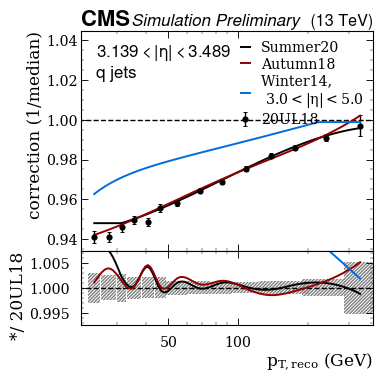

Plotting subsample:  q
Eta:  9
Saving plot for eta =  eta3p489to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_q_eta3p489to5p191.pdf / .png


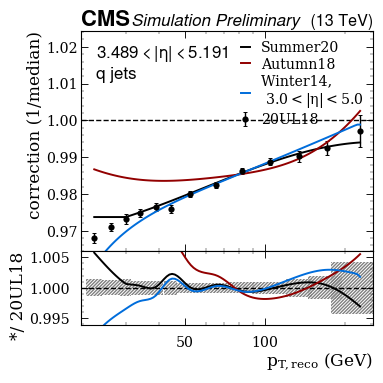

Plotting subsample:  all
Eta:  0
Saving plot for eta =  eta0p0to0p783
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta0p0to0p783.pdf / .png


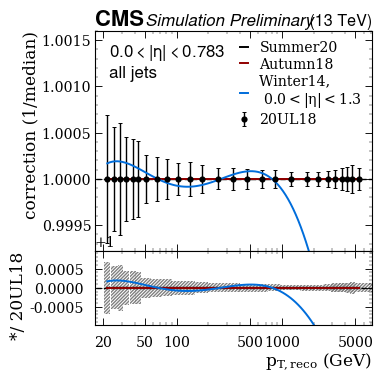

Plotting subsample:  all
Eta:  1
Saving plot for eta =  eta0p783to1p305
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta0p783to1p305.pdf / .png


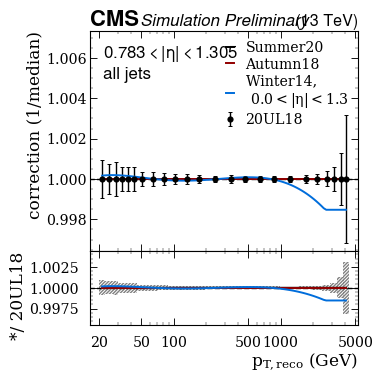

Plotting subsample:  all
Eta:  2
Saving plot for eta =  eta1p305to1p653
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta1p305to1p653.pdf / .png


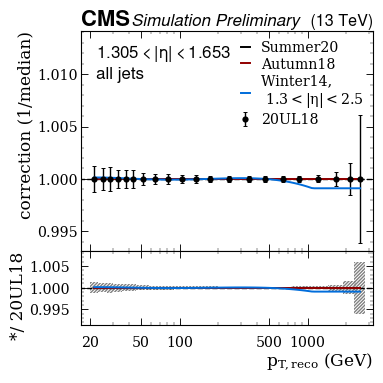

Plotting subsample:  all
Eta:  3
Saving plot for eta =  eta1p653to1p93
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta1p653to1p93.pdf / .png


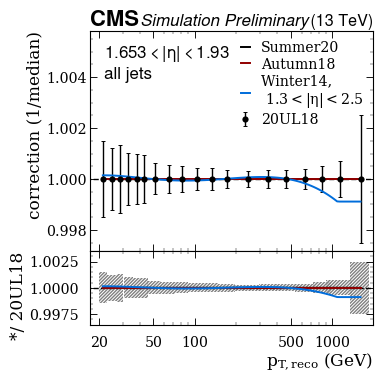

Plotting subsample:  all
Eta:  4
Saving plot for eta =  eta1p93to2p322
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta1p93to2p322.pdf / .png


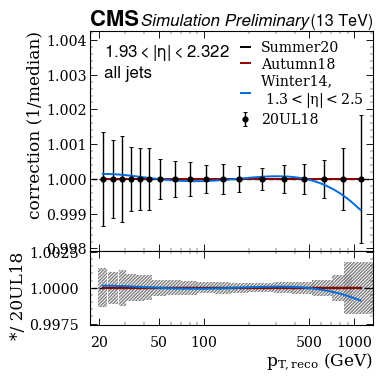

Plotting subsample:  all
Eta:  5
Saving plot for eta =  eta2p322to2p5
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta2p322to2p5.pdf / .png


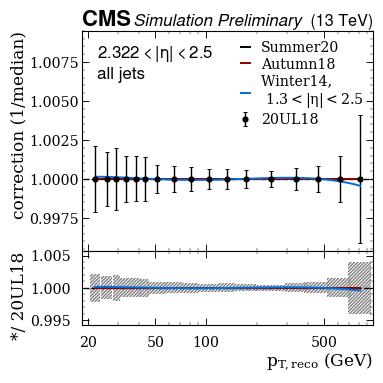

Plotting subsample:  all
Eta:  6
Saving plot for eta =  eta2p5to2p853
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta2p5to2p853.pdf / .png


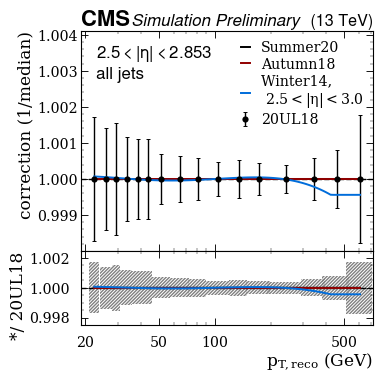

Plotting subsample:  all
Eta:  7
Saving plot for eta =  eta2p853to3p139
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta2p853to3p139.pdf / .png


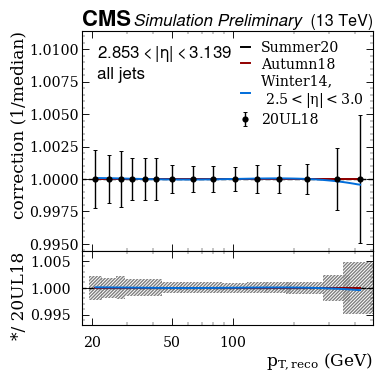

Plotting subsample:  all
Eta:  8
Saving plot for eta =  eta3p139to3p489
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta3p139to3p489.pdf / .png


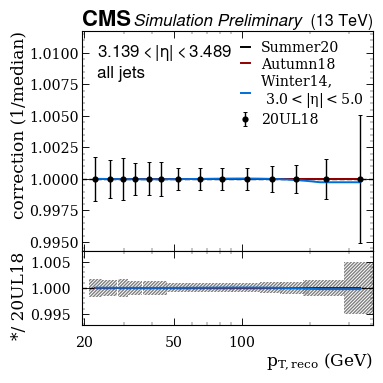

Plotting subsample:  all
Eta:  9
Saving plot for eta =  eta3p489to5p191
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14/corr_vs_pt_L5_20UL18Summer20-Autumn18-Winter14_all_eta3p489to5p191.pdf / .png


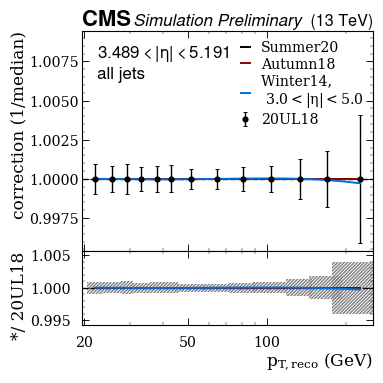

In [27]:
eta_binning  = "CoarseCalo"  ### HCalPart, JERC, CoarseCalo, CaloTowers, Summer20Flavor, onebin;
eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g']
flavors = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'all']
# flavors = ['all']
# etabins = np.array(JERC_Constants.etaBinsEdges_Aut18_full())
# etabins = np.array(JERC_Constants.etaBinsEdges_CaloTowers_full())
# etabins_abs = etabins[(len(etabins)-1)//2:]

# flavors = ['ud', 'b']
# flavors = ['all']

tag1 = '_L5_QCD-MG-Her'+eta_binning_str
tag2 = '_L5_QCD-Py'+eta_binning_str
tag3 = '_L5_QCD-MG-Py'+eta_binning_str
# tag3 = '_L5_QCD-divided'

closure_corr = read_data2("Median", "all", tag2) #divide by Pythia-standalone QCD

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_Aut18 = evaluator['Autumn18_V3_MC_Pythia8_all_L2Relative_AK4PFchs']
closure_Sum16 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
etabins = JetEtaBins(eta_binning, absolute=True)
ptbins = PtBins("MC_truth")


for samp in flavors:
    samp_Aut18 = samp
#     samp_Sum20 = '_'+samp
    samp_Aut18 = '_ud' if samp_Aut18=='u' or samp_Aut18=='d' or samp_Aut18=='q' else '_'+samp_Aut18
    
    evo_Her = evaluator[f'Autumn18_V3_MC_Herwig7{samp_Aut18}_L2Relative_AK4PFchs']
    evo = evaluator[f'Autumn18_V3_MC_Pythia8{samp_Aut18}_L2Relative_AK4PFchs']
    if samp_Aut18=='_all':
        evo2 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
    else:
        evo2 = evaluator[f'Summer16_07Aug2017_V15_Flavor_Pythia8_MC{samp_Aut18}_L5Flavor_AK4PFchs']
        
    if samp_Aut18!='_all':
        evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs{samp_Aut18}J']
#         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs{eta_binning_str}{samp_Aut18}J']
#         evo5 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{eta_binning_str}{samp_Aut18}J']
        evo6 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD{eta_binning_str}{samp_Aut18}J']
    else:
        evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs_aJ']
#         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs{eta_binning_str}_aJ']
#         evo5 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{eta_binning_str}_aJ']
        evo6 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD{eta_binning_str}_aJ']
#         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_aJ']
#     evo4 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
#     evo4_Her = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{samp_Aut18}J']

    data = {
            "20UL18": read_data4plot(samp, tag2, closure_corr),
#             "20UL18, Py": read_data4plot(samp, tag3, closure_corr),
#             "20UL18, Her": read_data4plot(samp, tag1, closure_corr) #, closure_corr),
           }
    
    functions = {
#             "Summer20, Py":    [evo4, None],    
#             "Summer20, Her":   [evo5, None],    
            "Summer20":        [evo6, None],

        #             "Summer20, Her":    [evo5, None],
            "Autumn18":    [evo, closure_Aut18],
            "Winter14":       [evo3, None],
#             "Autumn18_Her":   [evo_Her, closure_Aut18],
            
           }
    
    for k in range(etabins.nbins):
#     for k in ptbins.get_bin_idx([20, 35, 150, 400]):
        print('Plotting subsample: ', samp)
        print('Eta: ', k)
        if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
#             continue
#         if not np.any(median2[:,k]>-0.1):
            print("All median values are none")
            continue
        
        make_comparison_plot(data, 
                                  functions,
                                  etabins, ptbins,
                                  binidx=k, flav=samp, ratio_name='*/ 20UL18', plotvspt=True)
        
3;


In [ ]:
# eta_binning  = "CaloTowers"  ### HCalPart, JERC, CoarseCalo, CaloTowers, onebin;
# eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''
# # load_fit_res=True
# # subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g']
# flavors = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'all']
# # flavors = ['all']
# # etabins = np.array(JERC_Constants.etaBinsEdges_Aut18_full())
# # etabins = np.array(JERC_Constants.etaBinsEdges_CaloTowers_full())
# # etabins_abs = etabins[(len(etabins)-1)//2:]

# # flavors = ['ud', 'b']
# # flavors = ['all']

# # tag1 = '_L5_QCD-MG-Her'+eta_binning_str
# tag2 = '_L5_QCD-Py'+eta_binning_str
# # tag2 = '_L5_QCD-MG-Py'+eta_binning_str
# # tag3 = '_L5_QCD-divided'

# closure_corr = read_data2("Median", "all", tag2) #divide by Pythia

# mean_name = "Median"
# mean_name_std = mean_name+'Std'

# closure_Aut18 = evaluator['Autumn18_V3_MC_Pythia8_all_L2Relative_AK4PFchs']
# closure_Sum16 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
# etabins = JetEtaBins(eta_binning, absolute=True)


# for samp in flavors:
#     samp_Aut18 = samp
# #     samp_Sum20 = '_'+samp
#     samp_Aut18 = '_ud' if samp_Aut18=='u' or samp_Aut18=='d' or samp_Aut18=='q' else '_'+samp_Aut18
    
#     evo_Her = evaluator[f'Autumn18_V3_MC_Herwig7{samp_Aut18}_L2Relative_AK4PFchs']
#     evo = evaluator[f'Autumn18_V3_MC_Pythia8{samp_Aut18}_L2Relative_AK4PFchs']
#     if samp_Aut18=='_all':
#         evo2 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
#     else:
#         evo2 = evaluator[f'Summer16_07Aug2017_V15_Flavor_Pythia8_MC{samp_Aut18}_L5Flavor_AK4PFchs']
        
#     if samp_Aut18!='_all':
#         evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs{samp_Aut18}J']
# #         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py-etaAut18{samp_Aut18}J']
#         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD{eta_binning_str}{samp_Aut18}J']
# #         evo5 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{eta_binning_str}{samp_Aut18}J']
#     else:
#         evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs_aJ']
#         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD{eta_binning_str}_aJ']
# #         evo5 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{eta_binning_str}_aJ']
# #         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_aJ']
# #     evo4 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
# #     evo4_Her = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{samp_Aut18}J']

#     data = {
#             "20UL18": read_data4plot(samp, tag2, closure_corr),
# #             "20UL18, Her": read_data4plot(samp, tag1, closure_corr)
#            }
    
#     functions = {
# #             "Summer20_Her":   [evo4_Her, None],
#             "Summer20":    [evo4, None],    
# #             "Summer20, Her":    [evo5, None],
#             "Autumn18":    [evo, closure_Aut18],
# #             "Winter14":       [evo3, None],
# #             "Autumn18_Her":   [evo_Her, closure_Aut18],
            
#            }
    
#     for k in range(etabins.nbins):
#         print('Plotting subsample: ', samp)
#         print('Eta: ', k)
#         if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
# #             continue
# #         if not np.any(median2[:,k]>-0.1):
#             print("All median values are none")
#             continue
        
#         make_comparison_plot(data, 
#                                   functions,
#                                   etabins, ptbins[:-1],
#                                   etaidx=k, flav=samp, ratio_name='*/ 20UL18')
        
# 3;


In [16]:
# flavors = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'all']
# flavors = ['b', 'c', 'd', 's', 'g', 'ud', 'q', 'all']
flavors = ['all']

In [19]:
from plotters import plot_corrections_eta, plot_corrections

Figure saved: fig/corr_vs_pt/QCD-Py/corr_vs_eta_QCD-Py_all.pdf /.png


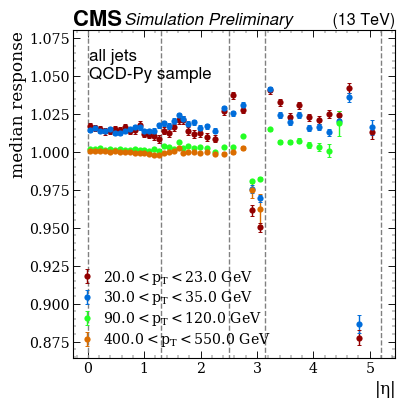

Figure saved: fig/corr_vs_pt/QCD-Py/corr_vs_pt_QCD-Py_all.pdf /.png


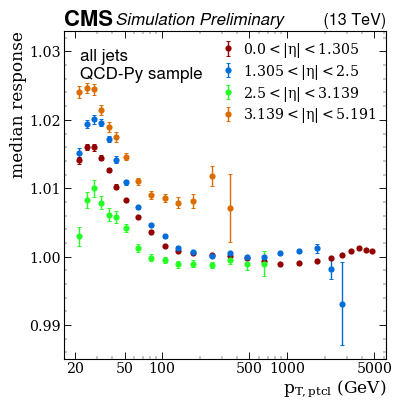

In [20]:
eta_binning = "CaloTowers"  ### HCalPart, JERC, CoarseCalo, CaloTowers, onebin;
eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''
# from plotters import plot_corrections_eta
tag1 = '_L5_Pythia-TTBAR'+eta_binning_str
tag2 = '_L5_QCD-Py'+eta_binning_str

etabins = JetEtaBins(eta_binning, absolute=True)
pt_bins = PtBins("MC_truth")
closure_corr = read_data2("Median", "all", tag2)
for flav in flavors:
    data = read_data4plot(flav, tag2)[:2]
    plot_corrections_eta(data[0], data[1], pt_bins, etabins.centres, tag2[:len(tag2)-1*len(eta_binning_str)], flav, plotptvals=[20, 30, 100, 400])

eta_binning = "HCalPart"  ### HCalPart, JERC, CoarseCalo, CaloTowers, onebin;
eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''
tag2 = '_L5_QCD-Py'+eta_binning_str
etabins = JetEtaBins(eta_binning, absolute=True)
pt_bins = PtBins("MC_truth")
for flav in flavors:
    data = read_data4plot(flav, tag2)[:2]  
    plot_corrections(data[0], data[1], pt_bins.centres, etabins, tag2[:len(tag2)-1*len(eta_binning_str)], flav, plotetavals=[0, 1.305, 2.5, 3.139])

In [ ]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g']
# subsamples = ['b', 'c', 'd', 'u', 's', 'g']

subsamples = ['ud', 'b']
# subsamples = ['all']


tag1 = '_L5_Herwig-QCD-etaAut18'
tag2 = '_L5_QCD-JME-etaAut18'
# tag3 = '_L5_QCD-divided'

closure_corr = read_data("Median", "all", tag2)
# closure_corr = read_data("Median", "all", tag2)

# df_csv = pd.read_csv('out_txt/Closure_L5_QCD_Pythia.coffea').set_index('etaBins')
# closure_corr = df_csv.to_numpy().transpose()

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_Aut18 = evaluator['Autumn18_V3_MC_Herwig7_all_L2Relative_AK4PFchs']


# closure_Sum16 = evaluator['Summer16_07Aug2017_V15_Flavor_Herwig7_MC_L2Relative_AK4PFchs']


for samp in subsamples:
    samp_Aut18 = samp
#     samp_Sum20 = '_'+samp
    samp_Aut18 = '_ud' if samp_Aut18=='u' or samp_Aut18=='d' else '_'+samp_Aut18
#     samp_Sum20 = '_q' if samp_Aut18=='_ud' else '_'+samp
#     samp_Sum16 = '' if samp_Aut18=='_all' else samp_Aut18

    median1 = read_data(mean_name, samp, tag1) #[2:]
    medianstd1 = read_data(mean_name_std, samp, tag1)
    reco_pt = read_data("MeanRecoPt", samp, tag1)

    median2 = read_data(mean_name, samp, tag2) #[2:]
    medianstd2 = read_data(mean_name_std, samp, tag2)
    evo = evaluator[f'Autumn18_V3_MC_Herwig7{samp_Aut18}_L2Relative_AK4PFchs']
#     if samp_Aut18=='_all':
#         evo2 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
#     else:
#         evo2 = evaluator[f'Summer16_07Aug2017_V15_Flavor_Pythia8_MC{samp_Aut18}_L5Flavor_AK4PFchs']
        
    evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
#     evo4 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
    evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{samp_Aut18}J']

    data = {
#             "No_closure": [median2, medianstd2, reco_pt],
            "Her7": [median1/closure_corr, medianstd1, reco_pt],
            "Py8": [median2/closure_corr, medianstd2, reco_pt],
           }
    
    functions = {
            "Autumn18_He": [evo, closure_Aut18],
            "Winter14":       [evo3, None],
            "Summer20_He":       [evo4, None],
           }
    
    for k in range(len(etabins_abs)-1):
#     for k in [9]:
        print('Plotting subsample: ', samp)
        print('Eta: ', k)
        if not np.any(median2[:,k]>-0.1):
            print("All median values are none")
            continue
#         median_4 = read_data("Median", samp, '_L5_LHEflav1_Herwig-TTBAR-JME-noLepIso')
#         medianstd_4 = read_data("MedianStd", samp, '_L5_LHEflav1_Herwig-TTBAR-JME-noLepIso')
        
#         make_comparison_plot_many(data,
#                               correction_fncs = np.array([None]), closures=[], k=0, samp='',
#                                name_base='', names=[], ratio_name='ratio'):
        
        make_comparison_plot(data, 
                                  functions,
                                  etaidx=k, samp=samp, ratio_name='*/ \n Herwig')
        
3;


### Double ration plots (for flavour vs antiflavour) responses

In [ ]:
# load_fit_res=True
flavors = ['b', 'c', 's', 'u', 'd']

k2 = np.where(etabins_abs<=0)[0][-1]
k4 = np.where(etabins_abs<=1.3)[0][-1]
k6 = np.where(etabins_abs<=2.5)[0][-1]
k8 = np.where(etabins_abs<=3.0)[0][-1]
ks = [k2, k4, k6, k8]

# ks = [k2, k4] #, k6, k8]
for flav in flavors:
    for k in ks:
        print('Fitting subsample: ', flav)
        print('Eta: ', k)        
        
        make_double_ratio_plot('_L5_LHEflav1_TTBAR-JME-100files', '_L5_LHEflav1_Herwig-TTBAR-JME-100files',
                                   etaidx=k, samp=flav,
                                   ratio_name='Jet response ratio, $\overline{'+flav+'}/'+flav+'$')
                
3;

In [ ]:
# # load_fit_res=True
# subsamples = ['_b', '_c', '_s', '_ud']
# # subsamples = ['_g']

# k2 = np.where(etabins_abs<=0)[0][-1]
# k4 = np.where(etabins_abs<=1.3)[0][-1]
# k6 = np.where(etabins_abs<=2.5)[0][-1]
# k8 = np.where(etabins_abs<=3.0)[0][-1]
# ks = [k2, k4, k6, k8]

# # ks = [k2, k4] #, k6, k8]
# for samp in subsamples:
#     for k in ks:
#         print('Fitting subsample: ', samp)
#         print('Eta: ', k)        
        
#         make_double_ratio_plot('_L5_LHEflav1_TTBAR-JME', '_L5_LHEflav1_Herwig-TTBAR-JME',
#                                    k=k, samp=samp,
#                                    ratio_name=f'{samp[1:]}bar /\n {samp[1:]}')
                
# 3;